<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/lipo%20with%20optuna%20median%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import math;

import sklearn 
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sklearn
from pandas import read_csv
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFdr
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# path = r"C:\\Users\\ahmad\\Desktop\\bace_global_cdf_rdkit.csv"
# fileX=open(path)
# dataXX=csv.reader(fileX)
# headerX=next(dataXX)
# print(os.uname())

In [25]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()

Saving lipo(Lables).csv to lipo(Lables) (1).csv


Saving lipo_global_cdf_rdkit.csv to lipo_global_cdf_rdkit (1).csv


In [26]:
import io
dataY = pd.read_csv(io.BytesIO(uploaded['lipo(Lables).csv']))
print(dataY[dataY.isnull().any(axis=1)])
print(dataY.shape)
dataY = dataY.drop(1561)
print(dataY.shape)

Empty DataFrame
Columns: [smiles, lipo]
Index: []
(4200, 2)
(4199, 2)


In [27]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))
data.head()

,"('RDKit2DNormalized_calculated', <class 'bool'>)","('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,True,0.165068,0.378858,0.267690,0.337793,0.353329,0.326565,0.389881,0.366088,0.409441,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.722127
1,True,0.765362,0.695748,0.776859,0.729485,0.788956,0.726874,0.648505,0.824561,0.609487,...,9.999565e-01,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.422093
2,True,0.714232,0.207465,0.161372,0.168520,0.240092,0.182951,0.183410,0.275841,0.190398,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,1.000000e+00,4.703598e-08,0.166633,0.855567
3,True,0.331822,0.569701,0.519154,0.417706,0.510189,0.519857,0.449285,0.540375,0.473398,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,1.000000e+00,4.703598e-08,0.166633,0.365929
4,True,0.864685,0.452665,0.595094,0.625074,0.578910,0.482260,0.514695,0.432820,0.672904,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.755285


[-1.18 3.69 3.37 ... 2.1 2.65 2.7]
      ('RDKit2DNormalized_calculated', <class 'bool'>)  \
1561                                              True   

      ('BalabanJ', <class 'numpy.float64'>)  \
1561                                  0.895   

      ('BertzCT', <class 'numpy.float64'>)  ('Chi0', <class 'numpy.float64'>)  \
1561                              0.230752                           0.031331   

      ('Chi0n', <class 'numpy.float64'>)  ('Chi0v', <class 'numpy.float64'>)  \
1561                            0.032387                            0.061726   

      ('Chi1', <class 'numpy.float64'>)  ('Chi1n', <class 'numpy.float64'>)  \
1561                           0.050799                            0.045963   

      ('Chi1v', <class 'numpy.float64'>)  ('Chi2n', <class 'numpy.float64'>)  \
1561                            0.116251                             0.04344   

      ...  ('fr_sulfonamd', <class 'numpy.float64'>)  \
1561  ...                               1.593061e-17 

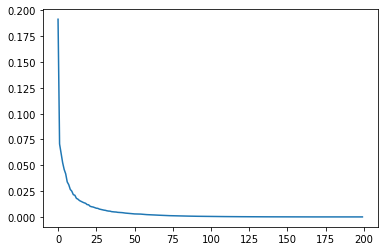

(840, 200)
(840, 1)
(3358, 200)
(3358, 1)


In [28]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import io

data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))

arrayY = dataY.values
Y = arrayY[1: , 1 ]
print(Y)
print(data[data.isnull().any(axis=1)])
print(len(data))
data = data.dropna()
print(len(data))
array = data.values
X = array[1:,1:]
print(X)
X_train, X_test ,Y_train , Y_test  = train_test_split(X, Y ,test_size=0.2)
scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))
print(data.shape)
print(len(X_test))
pca = PCA(n_components=200)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(200),pca.explained_variance_ratio_)
plt.show()
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

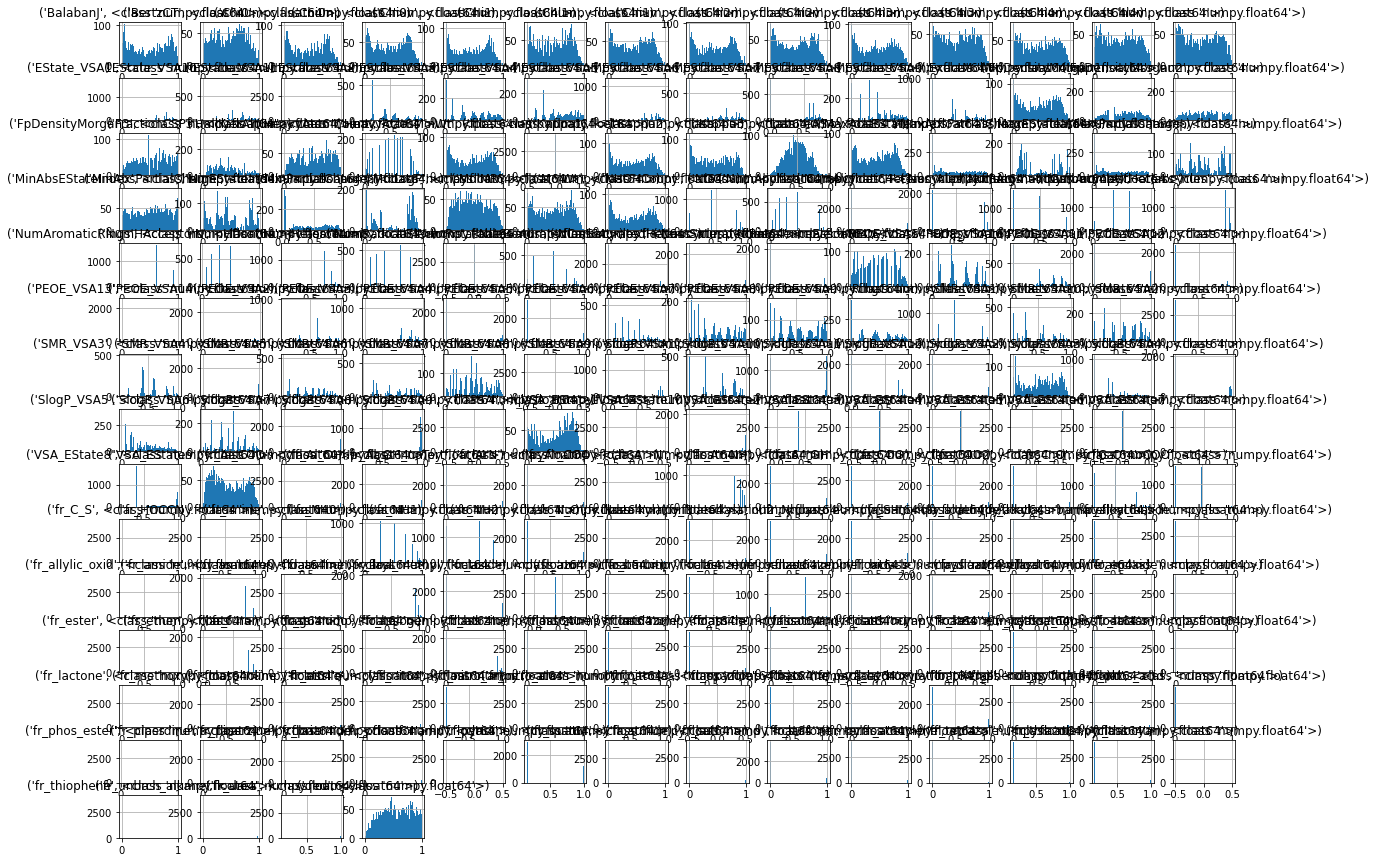

In [29]:
data.hist(bins=100, figsize=(20,15))

plt.show()

In [30]:
import pandas as pd
from sklearn import preprocessing
pca = PCA(n_components=60)
pca.fit(X_train)
X_train=pca.transform(X_train)



X_test = pca.transform(X_test)

scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))
print(scaler_data)

MinMaxScaler()


In [31]:
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

(840, 60)
(840, 1)
(3358, 60)
(3358, 1)


In [32]:
#Y_w = Y_train.reshape(-1,1)
Y_train_new =  Y_train.astype(np.float)
Y_test_new = Y_test.astype(np.float)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tensor_x_train = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x_test = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y_train = torch.tensor(Y_train_new , dtype=torch.float).to(device)
tensor_y_test= torch.tensor(Y_test_new, dtype=torch.float).to(device)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x_train, tensor_y_train) 
testset = TensorDataset(tensor_x_test,tensor_y_test)

In [34]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [35]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
# a = {"a":tune.quniform(50, 200, 10) , "b": 5}
# print(type(a.get("a")))
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [36]:
def load_data(data_dir=None):
    return trainset, testset

In [37]:
# # Net().__init__(self , confing) 
#     config = {
#         "act1 ": tune.choice(["relu","tanh","selu"]),
#         "act2" : tune.choice(["relu","tanh","selu"]),
#         "act3" : tune.choice(["relu","tanh","selu"]),
#         "lr": tune.quniform(0.0005, 0.001, 0.0001),
#         "batch_size": tune.choice([8, 16, 32]),
#         "hidden_dim1" : tune.quniform(50, 200, 10),
#         "hidden_dim2" : tune.quniform(50, 200, 10),
#         "hidden_dim3" : tune.quniform(50, 200, 10),
#     }
#   self = { "confing": confing , "hd":}
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1", 100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2", 100))
        self.hidden_dim3 = int(self.config.get("hidden_dim3", 100))

        self.act1 = self.config.get("act1", "relu") 
        self.act2 = self.config.get("act2", "relu") 
        self.act3 = self.config.get("act3", "relu")

        self.linear1 = nn.Linear(60, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, self.hidden_dim3)
        self.linear4 = nn.Linear(self.hidden_dim3, 1)
    
    @staticmethod
    def activation_func(act_str):
        if act_str=="tanh":
            return eval("torch."+act_str)
        elif act_str=="selu" or act_str=="relu":   
            return eval("torch.nn.functional."+act_str)

    def forward(self, x):
        output = self.linear1(x)
        output = self.activation_func(self.act1)(output)
        output = self.linear2(output)
        output = self.activation_func(self.act2)(output)
        output = self.linear3(output)
        output = self.activation_func(self.act3)(output)
        output = self.linear4(output)        
        return output

In [38]:
model = Net({})

In [39]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [40]:
summary(model, (1,tensor_x_train.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           6,100
            Linear-2               [-1, 1, 100]          10,100
            Linear-3               [-1, 1, 100]          10,100
            Linear-4                 [-1, 1, 1]             101
Total params: 26,401
Trainable params: 26,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.10
Estimated Total Size (MB): 0.10
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |    6000    |
|  linear1.bias  |    100     |
| linear2.weight |   10000    |
|  linear2.bias  |    100     |
| linear3.weight |   10000    |
|  linear3.bias  |    100     |
| linear4.we

26401

In [41]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    # criterion = nn.CrossEntropyLoss()

    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        val_loss = 0.0
        net.eval() # Prepare model for evaluation
        for i, data in enumerate(valloader):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)

                # Inverse transform of the labels' scaler
                outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
                labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")

In [42]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

In [43]:
ray.shutdown()
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

{'memory': 7934966171.0, 'CPU': 2.0, 'object_store_memory': 3967483084.0, 'node:172.28.0.2': 1.0}


''

In [44]:
%%capture
try:
    import optuna
except:
    %pip install optuna
    import optuna

In [45]:
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.optuna import OptunaSearch  
from ray.tune.suggest.dragonfly import DragonflySearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.schedulers.hb_bohb import HyperBandForBOHB
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.schedulers import MedianStoppingRule
from ray.tune.schedulers import PopulationBasedTraining
from ray.tune.suggest.bohb import TuneBOHB
from ray.tune.suggest.basic_variant import BasicVariantGenerator
from ray.tune.suggest import ConcurrencyLimiter

In [46]:
ray.shutdown()
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)

    scheduler = MedianStoppingRule(
    time_attr="training_iteration",
    grace_period=10,
    min_samples_required=10,
    hard_stop = True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-18 21:48:19,494	INFO tune.py:874 -- Initializing Ray automatically.For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run`.
2022-07-18 21:48:24,568	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-18 21:48:24 (running for 00:00:00.23)
Memory usage on this node: 2.4/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-18 21:48:30 (running for 00:00:05.48)
Memory usage on this node: 2.6/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 5/50 (1 PENDING, 4 RUNNING)


== Status ==
Current time: 2022-07-18 21:48:35 (running for 00:00:10.51)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24


(func pid=26162) 2022-07-18 21:50:04,261	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp821d4b/./
(func pid=26162) 2022-07-18 21:50:04,261	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 22.825079917907715, '_episodes_total': None}


Trial trainable_func_8474af56 reported epoch=2,loss=0.0231854587040805,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 110.0, 'hidden_dim3': 200.0}.
Trial trainable_func_596939b2 reported epoch=0,loss=0.021630207246945393,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.
Trial trainable_func_5993f1ca reported epoch=9,loss=0.021499654534081123,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26162) 2022-07-18 21:50:06,966	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp30aeb7/./
(func pid=26162) 2022-07-18 21:50:06,967	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 24.886537790298462, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:50:07,652	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpa4c558/./
(func pid=26227) 2022-07-18 21:50:07,653	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:50:07 (running for 00:01:43.05)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_7f8d60c8 reported epoch=6,loss=0.02193297395771139,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 130.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}.


(func pid=26162) 2022-07-18 21:50:09,718	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp90d6b7/./
(func pid=26162) 2022-07-18 21:50:09,718	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 26.853435754776, '_episodes_total': None}


Trial trainable_func_596939b2 reported epoch=0,loss=0.021466598872699545,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.01685161242247745,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:50:12,205	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp6d2cac/./
(func pid=26162) 2022-07-18 21:50:12,205	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 28.871240377426147, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:50:13,036	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpde92e9/./
(func pid=26227) 2022-07-18 21:50:13,037	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:50:12 (running for 00:01:48.42)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_8474af56 reported epoch=4,loss=0.0227826108940435,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 110.0, 'hidden_dim3': 200.0}.


(func pid=26162) 2022-07-18 21:50:14,887	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpc9ec2e/./
(func pid=26162) 2022-07-18 21:50:14,888	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 30.789533853530884, '_episodes_total': None}


Trial trainable_func_7f8d60c8 reported epoch=8,loss=0.02305746437017461,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 130.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}.
Trial trainable_func_596939b2 reported epoch=0,loss=0.02585512573328207,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.01750169229386935,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:50:17,539	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp082e69/./
(func pid=26162) 2022-07-18 21:50:17,539	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 32.88573956489563, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:50:18,364	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp304c01/./
(func pid=26227) 2022-07-18 21:50:18,365	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:50:18 (running for 00:01:53.72)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_7f8d60c8 reported epoch=9,loss=0.02073121999540925,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 130.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}.


(func pid=26162) 2022-07-18 21:50:21,631	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpb580f2/./
(func pid=26162) 2022-07-18 21:50:21,631	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 35.9348349571228, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:50:22,848	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpeb928f/./
(func pid=26217) 2022-07-18 21:50:22,848	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_tota

Trial trainable_func_8474af56 reported epoch=6,loss=0.029815005104870815,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 110.0, 'hidden_dim3': 200.0}.
== Status ==
Current time: 2022-07-18 21:50:23 (running for 00:01:58.97)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_596939b2 reported epoch=0,loss=0.019912145737690925,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26162) 2022-07-18 21:50:24,683	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp65b16a/./
(func pid=26162) 2022-07-18 21:50:24,683	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 38.40385603904724, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.022257063635496944,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26227) 2022-07-18 21:50:25,620	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpdf8a46/./
(func pid=26227) 2022-07-18 21:50:25,620	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 60.15975546836853, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:50:27,543	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpd83d83/./
(func pid=26162) 2022-07-18 21:50:27,543	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_tot

Trial trainable_func_596939b2 reported epoch=0,loss=0.018478569470055176,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-18 21:50:29 (running for 00:02:05.07)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_598c9740 reported epoch=0,loss=0.017306957959303336,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.021866037003805426,should_checkpoint=True with parameters={'act1 ': 'relu',

(func pid=26162) 2022-07-18 21:50:30,367	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp78d7e1/./
(func pid=26162) 2022-07-18 21:50:30,367	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 42.568084955215454, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:50:31,003	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp6b42a6/./
(func pid=26227) 2022-07-18 21:50:31,003	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_to

Trial trainable_func_8474af56 reported epoch=8,loss=0.023025283971199,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 110.0, 'hidden_dim3': 200.0}.


(func pid=26162) 2022-07-18 21:50:33,167	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp17114f/./
(func pid=26162) 2022-07-18 21:50:33,167	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 44.605271339416504, '_episodes_total': None}


Trial trainable_func_596939b2 reported epoch=0,loss=0.018185115568473336,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-18 21:50:35 (running for 00:02:10.58)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_598c9740 reported epoch=0,loss=0.014586125313943115,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:50:35,802	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp26c594/./
(func pid=26162) 2022-07-18 21:50:35,802	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 46.461920499801636, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:50:36,374	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpd75ffc/./
(func pid=26227) 2022-07-18 21:50:36,374	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_to

Trial trainable_func_5993f1ca reported epoch=0,loss=0.021087706036889284,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_599ec974 reported epoch=0,loss=0.020375841161200232,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26217) 2022-07-18 21:50:39,964	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp0dacb4/./
(func pid=26217) 2022-07-18 21:50:39,964	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 100.19800782203674, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:50:40 (running for 00:02:16.21)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_598c9740 reported epoch=0,loss=0.014775125684734814,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:50:40,810	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp80bb16/./
(func pid=26161) 2022-07-18 21:50:40,810	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 32.59961557388306, '_episodes_total': None}


Trial trainable_func_596939b2 reported epoch=0,loss=0.01918984479007116,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26227) 2022-07-18 21:50:41,386	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpfff0e9/./
(func pid=26227) 2022-07-18 21:50:41,386	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 73.04363441467285, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:50:42,299	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp433886/./
(func pid=26162) 2022-07-18 21:50:42,299	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:50:46 (running for 00:02:21.79)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_599ec974 reported epoch=0,loss=0.021844638264131994,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26227) 2022-07-18 21:50:46,390	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpedd602/./
(func pid=26227) 2022-07-18 21:50:46,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 77.33045506477356, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:50:47,309	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp7f16a6/./
(func pid=26161) 2022-07-18 21:50:47,309	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.021027893610869625,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_596939b2 reported epoch=0,loss=0.019558782708956786,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26217) 2022-07-18 21:50:47,904	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp803cbb/./
(func pid=26217) 2022-07-18 21:50:47,905	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 107.62510967254639, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:50:48,785	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp2586af/./
(func pid=26162) 2022-07-18 21:50:48,785	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_to

Trial trainable_func_598c9740 reported epoch=0,loss=0.014287281808202278,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26227) 2022-07-18 21:50:51,165	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp77a13a/./
(func pid=26227) 2022-07-18 21:50:51,166	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 81.62152934074402, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:50:52,171	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp179e73/./
(func pid=26162) 2022-07-18 21:50:52,171	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:50:52 (running for 00:02:27.57)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_599ec974 reported epoch=0,loss=0.019135943340802375,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26161) 2022-07-18 21:50:53,602	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpb2566e/./
(func pid=26161) 2022-07-18 21:50:53,603	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 41.600404024124146, '_episodes_total': None}


Trial trainable_func_596939b2 reported epoch=0,loss=0.017927762773691885,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26162) 2022-07-18 21:50:55,070	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp1a629d/./
(func pid=26162) 2022-07-18 21:50:55,070	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 59.173492193222046, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.01805482656888045,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.014522226972954895,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26217) 2022-07-18 21:50:56,185	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpa08bb1/./
(func pid=26217) 2022-07-18 21:50:56,186	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 115.24053025245667, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:50:56,618	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpc60cf8/./
(func pid=26227) 2022-07-18 21:50:56,619	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:50:57 (running for 00:02:32.72)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=26161) 2022-07-18 21:50:57,319	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp271961/./
(func pid=26161) 2022-07-18 21:50:57,319	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 44.07495617866516, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:50:58,001	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpa9fe2e/./
(func pid=26162) 2022-07-18 21:50:58,001	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_tot

Trial trainable_func_599ec974 reported epoch=0,loss=0.018829462214009246,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.
Trial trainable_func_596939b2 reported epoch=0,loss=0.01745852609023656,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:51:00,624	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp855860/./
(func pid=26161) 2022-07-18 21:51:00,624	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 46.680336236953735, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:51:01,139	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp57d0bc/./
(func pid=26227) 2022-07-18 21:51:01,139	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:51:03 (running for 00:02:38.48)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_5993f1ca reported epoch=0,loss=0.01902356265280846,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26161) 2022-07-18 21:51:03,884	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpccdb78/./
(func pid=26161) 2022-07-18 21:51:03,884	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 49.09131455421448, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:51:04,654	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp40daf9/./
(func pid=26217) 2022-07-18 21:51:04,654	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_tot

Trial trainable_func_598c9740 reported epoch=0,loss=0.0168791442800399,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
Trial trainable_func_599ec974 reported epoch=0,loss=0.017834380433908333,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26227) 2022-07-18 21:51:06,137	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpfe1dbf/./
(func pid=26227) 2022-07-18 21:51:06,140	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 94.23955392837524, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:51:06,920	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpbb87d3/./
(func pid=26161) 2022-07-18 21:51:06,920	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_tot

Trial trainable_func_596939b2 reported epoch=0,loss=0.01687220317545782,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26162) 2022-07-18 21:51:07,966	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp717b90/./
(func pid=26162) 2022-07-18 21:51:07,966	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 67.31678366661072, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:51:09 (running for 00:02:44.92)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=26161) 2022-07-18 21:51:10,278	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp966ceb/./
(func pid=26161) 2022-07-18 21:51:10,278	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 53.60438919067383, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.01410247801010486,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:51:10,916	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp5a8d19/./
(func pid=26162) 2022-07-18 21:51:10,916	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 69.41108989715576, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:51:11,852	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpcbf96b/./
(func pid=26227) 2022-07-18 21:51:11,852	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.018017831167845985,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_599ec974 reported epoch=0,loss=0.01829363033947864,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26217) 2022-07-18 21:51:12,766	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpb09126/./
(func pid=26217) 2022-07-18 21:51:12,767	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 130.32353568077087, '_episodes_total': None}


Trial trainable_func_596939b2 reported epoch=0,loss=0.01718499950450753,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:51:13,417	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp82b54f/./
(func pid=26161) 2022-07-18 21:51:13,417	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 55.783387899398804, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:51:14,212	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpf13122/./
(func pid=26162) 2022-07-18 21:51:14,212	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:51:15 (running for 00:02:51.07)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_598c9740 reported epoch=0,loss=0.014143000356767185,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:51:16,367	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpe0533e/./
(func pid=26161) 2022-07-18 21:51:16,367	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 57.98046827316284, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:51:16,900	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpb911d1/./
(func pid=26227) 2022-07-18 21:51:16,901	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_tot

Trial trainable_func_599ec974 reported epoch=0,loss=0.01651001947980209,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26161) 2022-07-18 21:51:19,345	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp387c56/./
(func pid=26161) 2022-07-18 21:51:19,346	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 60.109967947006226, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.02048536176303765,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_596939b2 reported epoch=0,loss=0.016137315891059927,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26217) 2022-07-18 21:51:20,558	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp300501/./
(func pid=26217) 2022-07-18 21:51:20,558	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 137.5384817123413, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:51:21,215	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp50403c/./
(func pid=26162) 2022-07-18 21:51:21,216	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:51:21 (running for 00:02:56.62)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=26227) 2022-07-18 21:51:21,818	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp746367/./
(func pid=26227) 2022-07-18 21:51:21,819	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 106.5632655620575, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:51:22,477	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp300741/./
(func pid=26161) 2022-07-18 21:51:22,477	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_tot

Trial trainable_func_599ec974 reported epoch=0,loss=0.015231464322647312,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.
Trial trainable_func_596939b2 reported epoch=0,loss=0.014430223579674353,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:51:25,926	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp5bc842/./
(func pid=26161) 2022-07-18 21:51:25,937	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 64.65462398529053, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:51:26 (running for 00:03:02.29)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_598c9740 reported epoch=0,loss=0.01325321344975307,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:51:26,882	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp34eabe/./
(func pid=26162) 2022-07-18 21:51:26,882	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 79.73529481887817, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:51:27,714	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp2f36f2/./
(func pid=26227) 2022-07-18 21:51:27,714	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.01914656451526951,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:51:28,816	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpd3daa0/./
(func pid=26217) 2022-07-18 21:51:28,816	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 145.12425255775452, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:51:29,353	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp1f1435/./
(func pid=26161) 2022-07-18 21:51:29,353	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_to

Trial trainable_func_599ec974 reported epoch=0,loss=0.018092549692802683,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-18 21:51:32 (running for 00:03:07.78)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_596939b2 reported epoch=0,loss=0.013121880341047895,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.014149338230782751,should_checkpoint=True with parameters={'act1 ': 'relu', '

(func pid=26161) 2022-07-18 21:51:32,378	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp2d56b4/./
(func pid=26161) 2022-07-18 21:51:32,378	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 69.30501580238342, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:51:32,921	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp8bd011/./
(func pid=26227) 2022-07-18 21:51:32,924	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.01776175315681937,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26162) 2022-07-18 21:51:36,482	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp8a3651/./
(func pid=26162) 2022-07-18 21:51:36,482	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 85.93712091445923, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:51:37,350	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpeb4e34/./
(func pid=26217) 2022-07-18 21:51:37,350	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:51:37 (running for 00:03:12.81)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_596939b2 reported epoch=0,loss=0.01259712558092844,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.
Trial trainable_func_599ec974 reported epoch=0,loss=0.014732974710594003,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26227) 2022-07-18 21:51:38,209	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpea6cda/./
(func pid=26227) 2022-07-18 21:51:38,210	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 119.46483826637268, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:51:38,616	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpa1920a/./
(func pid=26162) 2022-07-18 21:51:38,618	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:51:42 (running for 00:03:18.24)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_598c9740 reported epoch=0,loss=0.012786958308435778,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:51:42,838	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpa69096/./
(func pid=26161) 2022-07-18 21:51:42,838	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 76.61608266830444, '_episodes_total': None}


Trial trainable_func_596939b2 reported epoch=0,loss=0.013502562576426727,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26227) 2022-07-18 21:51:43,679	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpdb17d4/./
(func pid=26227) 2022-07-18 21:51:43,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 123.88388085365295, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:51:44,377	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp17acd0/./
(func pid=26162) 2022-07-18 21:51:44,377	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_to

Trial trainable_func_5993f1ca reported epoch=0,loss=0.016378501907996133,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_599ec974 reported epoch=0,loss=0.01372253475793281,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26217) 2022-07-18 21:51:45,944	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp65f9fc/./
(func pid=26217) 2022-07-18 21:51:45,944	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 160.58066534996033, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:51:46,607	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpb14d49/./
(func pid=26161) 2022-07-18 21:51:46,608	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_to

Trial trainable_func_598c9740 reported epoch=0,loss=0.011990683043763323,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:51:48 (running for 00:03:23.69)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=26227) 2022-07-18 21:51:49,072	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp5d214b/./
(func pid=26227) 2022-07-18 21:51:49,082	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 128.41786885261536, '_episodes_total': None}


Trial trainable_func_596939b2 reported epoch=0,loss=0.01198826385216012,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:51:50,474	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpd1b952/./
(func pid=26161) 2022-07-18 21:51:50,474	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 81.91810083389282, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:51:51,675	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp03b223/./
(func pid=26162) 2022-07-18 21:51:51,676	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_tot

Trial trainable_func_599ec974 reported epoch=0,loss=0.013679205054121442,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-18 21:51:54 (running for 00:03:29.60)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=26161) 2022-07-18 21:51:54,791	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp38cf02/./
(func pid=26161) 2022-07-18 21:51:54,791	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 85.59241247177124, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.01293165134505399,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.022907649177261718,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26162) 2022-07-18 21:51:55,562	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp93659f/./
(func pid=26162) 2022-07-18 21:51:55,562	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 99.340891122818, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:51:56,190	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpbed8ec/./
(func pid=26227) 2022-07-18 21:51:56,194	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total

Trial trainable_func_596939b2 reported epoch=0,loss=0.012303605930235892,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:51:57,962	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpe751b1/./
(func pid=26161) 2022-07-18 21:51:57,962	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 87.93647742271423, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:51:58,846	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmp0abc22/./
(func pid=26162) 2022-07-18 21:51:58,847	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_tot

Trial trainable_func_599ec974 reported epoch=0,loss=0.013256679634115412,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-18 21:52:00 (running for 00:03:36.01)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=26161) 2022-07-18 21:52:01,032	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp1f7d00/./
(func pid=26161) 2022-07-18 21:52:01,032	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 90.51902842521667, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.01371437816476687,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:52:01,551	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpe10793/./
(func pid=26162) 2022-07-18 21:52:01,552	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 103.29698872566223, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:52:02,444	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpbc9215/./
(func pid=26227) 2022-07-18 21:52:02,444	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_to

Trial trainable_func_596939b2 reported epoch=0,loss=0.01375648665316828,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:52:03,926	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp4758c3/./
(func pid=26161) 2022-07-18 21:52:03,926	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 92.70008611679077, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:52:04,805	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_596939b2_1_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=50.0000,hidden_dim3=50.0000,_2022-07-18_21-48-24/checkpoint_tmpf45bfa/./
(func pid=26162) 2022-07-18 21:52:04,805	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.017539700132102112,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 21:52:05 (running for 00:03:41.31)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=26217) 2022-07-18 21:52:05,939	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp1f3850/./
(func pid=26217) 2022-07-18 21:52:05,939	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 178.6335470676422, '_episodes_total': None}


Trial trainable_func_599ec974 reported epoch=0,loss=0.011346018058420856,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.014928472475872104,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
Trial trainable_func_596939b2 reported epoch=0,loss=0.013284766207841766,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 50.0, 'hidden_dim3': 50.0}. This trial completed.


(func pid=26161) 2022-07-18 21:52:07,111	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp38c16c/./
(func pid=26161) 2022-07-18 21:52:07,113	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 95.23136234283447, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:52:07,744	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp0b7361/./
(func pid=26227) 2022-07-18 21:52:07,744	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_tot

Trial trainable_func_598c9740 reported epoch=0,loss=0.01540603610701614,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:12 (running for 00:03:47.63)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)


Trial trainable_func_599ec974 reported epoch=0,loss=0.011272918007096972,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26227) 2022-07-18 21:52:12,925	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpa2a73a/./
(func pid=26227) 2022-07-18 21:52:12,926	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 148.17888379096985, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:52:13,754	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp51477a/./
(func pid=26161) 2022-07-18 21:52:13,754	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_to

Trial trainable_func_5993f1ca reported epoch=0,loss=0.01972842036551474,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:52:15,302	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp799da8/./
(func pid=26217) 2022-07-18 21:52:15,303	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 187.34554076194763, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.024261010545525725,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26161) 2022-07-18 21:52:16,802	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp52a120/./
(func pid=26161) 2022-07-18 21:52:16,802	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 102.54955792427063, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.012826016574444028,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:17 (running for 00:03:52.90)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)




(func pid=26227) 2022-07-18 21:52:18,266	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp0b253f/./
(func pid=26227) 2022-07-18 21:52:18,267	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 152.68951630592346, '_episodes_total': None}


Trial trainable_func_599ec974 reported epoch=0,loss=0.014403219862179004,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26161) 2022-07-18 21:52:20,402	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp0d2088/./
(func pid=26161) 2022-07-18 21:52:20,402	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 105.10832166671753, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.01257743302578041,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:22 (running for 00:03:58.01)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)




(func pid=26227) 2022-07-18 21:52:23,309	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpd973a2/./
(func pid=26227) 2022-07-18 21:52:23,309	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 156.9710657596588, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:52:23,980	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp9947e7/./
(func pid=26161) 2022-07-18 21:52:23,981	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.015003995096011464,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:52:24,738	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp60d1d2/./
(func pid=26217) 2022-07-18 21:52:24,738	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 195.6559545993805, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=1,loss=0.023120614727878477,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_599ec974 reported epoch=0,loss=0.010009288160006643,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26161) 2022-07-18 21:52:27,370	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmpc9b2cc/./
(func pid=26161) 2022-07-18 21:52:27,370	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 110.3475456237793, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.012423910907803018,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:28 (running for 00:04:03.47)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)




(func pid=26227) 2022-07-18 21:52:28,694	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpbc89e3/./
(func pid=26227) 2022-07-18 21:52:28,695	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 161.6264247894287, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:52:30,759	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp0d2e05/./
(func pid=26161) 2022-07-18 21:52:30,760	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.013547298156658288,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 21:52:33 (running for 00:04:08.81)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 11/50 (7 PAUSED, 3 RUNNING, 1 TERMINATED)


Trial trainable_func_de6ebb6e reported epoch=2,loss=0.022379888546801497,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.010935903231317403,should_checkpoint=True with parameters={'a

(func pid=26217) 2022-07-18 21:52:33,424	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp249c4e/./
(func pid=26217) 2022-07-18 21:52:33,424	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 203.777667760849, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:52:33,822	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp52b61c/./
(func pid=26161) 2022-07-18 21:52:33,823	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_tota

Trial trainable_func_598c9740 reported epoch=0,loss=0.010804820409769197,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:39 (running for 00:04:14.45)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)


Trial trainable_func_599ec974 reported epoch=0,loss=0.011317107932247371,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26227) 2022-07-18 21:52:39,728	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp477edf/./
(func pid=26227) 2022-07-18 21:52:39,728	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 170.68203330039978, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:52:40,519	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp6e22f5/./
(func pid=26161) 2022-07-18 21:52:40,519	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_to

Trial trainable_func_5993f1ca reported epoch=0,loss=0.016619745825451476,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:52:41,948	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp5c1720/./
(func pid=26217) 2022-07-18 21:52:41,948	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 211.40097999572754, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=3,loss=0.02489349340429485,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26161) 2022-07-18 21:52:43,732	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp3917fe/./
(func pid=26161) 2022-07-18 21:52:43,732	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 122.75836849212646, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.0104585492977435,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:44 (running for 00:04:19.72)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)




(func pid=26227) 2022-07-18 21:52:45,087	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp767987/./
(func pid=26227) 2022-07-18 21:52:45,087	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 175.19729685783386, '_episodes_total': None}


Trial trainable_func_599ec974 reported epoch=0,loss=0.009631138616928162,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}.


(func pid=26161) 2022-07-18 21:52:46,571	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_599ec974_4_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=110.0000,hidden_dim3=80.000_2022-07-18_21-48-24/checkpoint_tmp8aaddd/./
(func pid=26161) 2022-07-18 21:52:46,571	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 124.95446634292603, '_episodes_total': None}


Trial trainable_func_599ec974 reported epoch=0,loss=0.00918258571788588,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 110.0, 'hidden_dim3': 80.0}. This trial completed.
Trial trainable_func_598c9740 reported epoch=0,loss=0.010680612709061593,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:49 (running for 00:04:25.06)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)




(func pid=26227) 2022-07-18 21:52:50,514	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp727643/./
(func pid=26227) 2022-07-18 21:52:50,514	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 179.70826148986816, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.01565286120377874,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_de6ebb6e reported epoch=4,loss=0.026567976590983762,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26217) 2022-07-18 21:52:51,624	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp3a45a3/./
(func pid=26217) 2022-07-18 21:52:51,624	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 220.50768733024597, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.02978196268462677,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.011185182353942155,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:52:55 (running for 00:04:30.45)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)




(func pid=26227) 2022-07-18 21:52:55,820	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpc61f0e/./
(func pid=26227) 2022-07-18 21:52:55,820	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 184.1931824684143, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.013934871025234205,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 21:53:00 (running for 00:04:35.52)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)


Trial trainable_func_598c9740 reported epoch=0,loss=0.016256724952798722,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
Trial trainable_func_de6ebb6e reported epoch=5,loss=0.02183135075791304,should_checkpoint=True with parameters={'

(func pid=26217) 2022-07-18 21:53:00,660	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpe4874d/./
(func pid=26217) 2022-07-18 21:53:00,661	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 228.9616379737854, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=2,loss=0.028801495747566044,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26227) 2022-07-18 21:53:01,187	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp220c24/./
(func pid=26227) 2022-07-18 21:53:01,188	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 188.88902854919434, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:53:05 (running for 00:04:40.64)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)


Trial trainable_func_598c9740 reported epoch=0,loss=0.012059870302570866,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.


(func pid=26227) 2022-07-18 21:53:06,624	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpa5d264/./
(func pid=26227) 2022-07-18 21:53:06,624	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 193.52012181282043, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.01579241335465187,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_f6e003ec reported epoch=4,loss=0.022974686281776686,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 21:53:09,595	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpffc3cb/./
(func pid=26217) 2022-07-18 21:53:09,596	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 236.99993658065796, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=6,loss=0.022745506267656684,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.011835568331696572,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:53:11 (running for 00:04:46.61)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)




(func pid=26227) 2022-07-18 21:53:11,936	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpb8fd9b/./
(func pid=26227) 2022-07-18 21:53:11,937	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 198.04861307144165, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.013392297503503797,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:53:16 (running for 00:04:52.30)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)




(func pid=26227) 2022-07-18 21:53:17,576	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp8b3cf4/./
(func pid=26227) 2022-07-18 21:53:17,576	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 202.8691372871399, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.01556319130371325,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_f6e003ec reported epoch=6,loss=0.024238778105082105,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 21:53:18,683	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp891182/./
(func pid=26217) 2022-07-18 21:53:18,683	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 245.2873969078064, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=7,loss=0.027990885408048918,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-18 21:53:23 (running for 00:04:59.41)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)


Trial trainable_func_598c9740 reported epoch=0,loss=0.010178970644249481,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
Trial trainable_func_f6e003ec reported epoch=7,loss=0.022977384049871707,should_checkpoint=True with parameters={

(func pid=26227) 2022-07-18 21:53:24,765	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp239a46/./
(func pid=26227) 2022-07-18 21:53:24,766	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 209.32488226890564, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:53:29 (running for 00:05:04.65)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)


Trial trainable_func_5993f1ca reported epoch=0,loss=0.012997600624646458,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_de6ebb6e reported epoch=8,loss=0.021010279884998158,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_598c9740 reported epoch=0,loss=0.01103604269282088,should_checkpoint=True with parameters={'ac

(func pid=26217) 2022-07-18 21:53:29,763	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp1206c8/./
(func pid=26217) 2022-07-18 21:53:29,764	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 255.89766812324524, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:53:30,295	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmpc26288/./
(func pid=26227) 2022-07-18 21:53:30,295	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_to

Trial trainable_func_f6e003ec reported epoch=9,loss=0.021040971207056863,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 21:53:34 (running for 00:05:10.19)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)




(func pid=26227) 2022-07-18 21:53:35,549	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp87386f/./
(func pid=26227) 2022-07-18 21:53:35,549	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 218.46299982070923, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.016220350939318274,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26161) 2022-07-18 21:53:37,776	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpd99456/./
(func pid=26161) 2022-07-18 21:53:37,781	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 25.14789056777954, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:53:38,609	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp39e509/./
(func pid=26217) 2022-07-18 21:53:38,609	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_tot

Trial trainable_func_de6ebb6e reported epoch=9,loss=0.019885821506701633,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-18 21:53:40 (running for 00:05:15.53)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)


Trial trainable_func_598c9740 reported epoch=0,loss=0.011453872602053296,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.019980494634997598,should_checkpoint=True with parameters={

(func pid=26227) 2022-07-18 21:53:41,325	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_598c9740_2_act1=relu,act2=selu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=100.0000,hidden_dim3=190.00_2022-07-18_21-48-24/checkpoint_tmp260a18/./
(func pid=26227) 2022-07-18 21:53:41,325	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 223.67926120758057, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:53:42,128	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpd4bed2/./
(func pid=26161) 2022-07-18 21:53:42,128	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:53:45 (running for 00:05:20.60)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)




(func pid=26161) 2022-07-18 21:53:45,874	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpb1744a/./
(func pid=26161) 2022-07-18 21:53:45,880	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 31.272517204284668, '_episodes_total': None}


Trial trainable_func_598c9740 reported epoch=0,loss=0.01171970333294209,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 100.0, 'hidden_dim3': 190.0}. This trial completed.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.013279955345589371,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:53:48,546	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpe6d105/./
(func pid=26217) 2022-07-18 21:53:48,546	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 272.8809320926666, '_episodes_total': None}


Trial trainable_func_59aa4420 reported epoch=0,loss=0.016891594139530987,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
Trial trainable_func_de6ebb6e reported epoch=10,loss=0.020159380149778767,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26161) 2022-07-18 21:53:49,375	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp916cf4/./
(func pid=26161) 2022-07-18 21:53:49,376	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 34.01196241378784, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:53:50,112	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp024acd/./
(func pid=26162) 2022-07-18 21:53:50,112	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:53:50 (running for 00:05:25.71)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_7014ad7c reported epoch=0,loss=0.018446371026931967,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:53:52,973	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpf0f9f5/./
(func pid=26162) 2022-07-18 21:53:52,974	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 25.500293970108032, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:53:53,809	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp2f5207/./
(func pid=26161) 2022-07-18 21:53:53,810	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_to

Trial trainable_func_19757d4c reported epoch=0,loss=0.07892915151717471,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-18 21:53:55 (running for 00:05:30.75)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_59aa4420 reported epoch=0,loss=0.017111536338018124,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26162) 2022-07-18 21:53:56,648	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp33bc5e/./
(func pid=26162) 2022-07-18 21:53:56,649	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 28.316826820373535, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.013835476469877043,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26161) 2022-07-18 21:53:57,454	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpbc4b68/./
(func pid=26161) 2022-07-18 21:53:57,454	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 39.78849172592163, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:53:58,244	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpe30ec4/./
(func pid=26217) 2022-07-18 21:53:58,245	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_tot

Trial trainable_func_7014ad7c reported epoch=0,loss=0.019572511748974182,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:54:00,034	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp079072/./
(func pid=26162) 2022-07-18 21:54:00,034	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 30.7127685546875, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:54:01 (running for 00:05:36.63)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)




(func pid=26161) 2022-07-18 21:54:01,232	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp8df29f/./
(func pid=26161) 2022-07-18 21:54:01,233	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 42.48012089729309, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:03,390	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpbae655/./
(func pid=26162) 2022-07-18 21:54:03,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_tot

Trial trainable_func_19757d4c reported epoch=1,loss=0.023187562353677964,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.024824486518561145,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:54:04,687	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp150e2a/./
(func pid=26161) 2022-07-18 21:54:04,687	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 45.241490602493286, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.01979274963431384,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-18 21:54:06 (running for 00:05:41.71)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=26162) 2022-07-18 21:54:07,177	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp82140f/./
(func pid=26162) 2022-07-18 21:54:07,177	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 36.190176010131836, '_episodes_total': None}


Trial trainable_func_5993f1ca reported epoch=0,loss=0.01361634023834926,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:54:07,977	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpf9d098/./
(func pid=26217) 2022-07-18 21:54:07,980	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 290.67935514450073, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:54:08,713	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpde5216/./
(func pid=26161) 2022-07-18 21:54:08,713	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_to

Trial trainable_func_59aa4420 reported epoch=0,loss=0.017928590001865145,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-18 21:54:11 (running for 00:05:47.10)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_19757d4c reported epoch=2,loss=0.02600938151607374,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.


(func pid=26161) 2022-07-18 21:54:12,463	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp2ca6e6/./
(func pid=26161) 2022-07-18 21:54:12,463	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 50.93135476112366, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.018549670553279288,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:54:13,821	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpd4cdb0/./
(func pid=26162) 2022-07-18 21:54:13,821	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 41.10752272605896, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:54:16,145	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp323072/./
(func pid=26161) 2022-07-18 21:54:16,152	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:54:17 (running for 00:05:52.48)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)


Trial trainable_func_5993f1ca reported epoch=0,loss=0.01566372307664765,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26162) 2022-07-18 21:54:17,080	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp1933f6/./
(func pid=26162) 2022-07-18 21:54:17,084	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 43.37523913383484, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:54:18,068	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpedcc07/./
(func pid=26217) 2022-07-18 21:54:18,068	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_tot

Trial trainable_func_59aa4420 reported epoch=0,loss=0.013561835247913797,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
Trial trainable_func_7014ad7c reported epoch=0,loss=0.01791740137799193,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:54:19,633	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp61d9b7/./
(func pid=26161) 2022-07-18 21:54:19,633	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 56.368552684783936, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:20,655	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp70f1e8/./
(func pid=26162) 2022-07-18 21:54:20,655	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_to

Trial trainable_func_19757d4c reported epoch=3,loss=0.024438679439288537,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-18 21:54:22 (running for 00:05:57.65)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=26161) 2022-07-18 21:54:23,094	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpbaf537/./
(func pid=26161) 2022-07-18 21:54:23,094	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 58.8977472782135, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:24,187	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp895b3f/./
(func pid=26162) 2022-07-18 21:54:24,188	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_tota

Trial trainable_func_59aa4420 reported epoch=0,loss=0.014094451091223198,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.013920594541337402,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26161) 2022-07-18 21:54:26,684	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp9c3271/./
(func pid=26161) 2022-07-18 21:54:26,690	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 61.61094117164612, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.016148656994675322,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26217) 2022-07-18 21:54:27,201	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp0a41e7/./
(func pid=26217) 2022-07-18 21:54:27,201	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 308.1180076599121, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:28,061	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp313fc6/./
(func pid=26162) 2022-07-18 21:54:28,061	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:54:28 (running for 00:06:03.44)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)


Trial trainable_func_19757d4c reported epoch=4,loss=0.0227188527287634,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.


(func pid=26161) 2022-07-18 21:54:30,268	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpea4c98/./
(func pid=26161) 2022-07-18 21:54:30,268	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 64.38018226623535, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:31,454	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp75c8c8/./
(func pid=26162) 2022-07-18 21:54:31,454	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_tot

Trial trainable_func_59aa4420 reported epoch=0,loss=0.013791247963533669,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-18 21:54:33 (running for 00:06:08.66)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_7014ad7c reported epoch=0,loss=0.014474210850446019,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:54:33,896	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmped871e/./
(func pid=26161) 2022-07-18 21:54:33,896	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 67.17987298965454, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:34,749	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpb942d0/./
(func pid=26162) 2022-07-18 21:54:34,750	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.02011194319629754,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:54:37,135	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpf03a23/./
(func pid=26217) 2022-07-18 21:54:37,138	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 317.2381019592285, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:54:37,758	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp85fd38/./
(func pid=26161) 2022-07-18 21:54:37,762	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:54:38 (running for 00:06:13.83)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)


Trial trainable_func_19757d4c reported epoch=5,loss=0.02279722586283226,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.013261824080586822,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
Trial trainable_func_7014ad7c reported epoch=0,loss=0.013923313317587468,should_checkpoint=True with parameters={'a

(func pid=26161) 2022-07-18 21:54:41,099	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpefb8fd/./
(func pid=26161) 2022-07-18 21:54:41,100	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 72.54582858085632, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:41,825	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp0501ae/./
(func pid=26162) 2022-07-18 21:54:41,825	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:54:43 (running for 00:06:19.21)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=26161) 2022-07-18 21:54:44,516	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp85cb49/./
(func pid=26161) 2022-07-18 21:54:44,516	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 75.09873557090759, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:45,334	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp95fa2e/./
(func pid=26162) 2022-07-18 21:54:45,334	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.011646379581922,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26217) 2022-07-18 21:54:46,320	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp405024/./
(func pid=26217) 2022-07-18 21:54:46,320	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 325.6791322231293, '_episodes_total': None}


Trial trainable_func_19757d4c reported epoch=6,loss=0.022431743251154917,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.013454879426270735,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
Trial trainable_func_7014ad7c reported epoch=0,loss=0.0208093614468516,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:54:48,121	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp56d861/./
(func pid=26161) 2022-07-18 21:54:48,121	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 77.97628021240234, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:48,951	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp07c705/./
(func pid=26162) 2022-07-18 21:54:48,952	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:54:48 (running for 00:06:24.34)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)


Trial trainable_func_7014ad7c reported epoch=0,loss=0.012028665066848021,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:54:53,313	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp6fb05f/./
(func pid=26161) 2022-07-18 21:54:53,314	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 82.13895750045776, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:54:54 (running for 00:06:29.55)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)


Trial trainable_func_59aa4420 reported epoch=0,loss=0.014202320983956643,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.01271860654799187,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26162) 2022-07-18 21:54:54,172	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp40b72c/./
(func pid=26162) 2022-07-18 21:54:54,172	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 70.3300211429596, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:54:56,920	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp6309f7/./
(func pid=26161) 2022-07-18 21:54:56,920	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_tota

Trial trainable_func_19757d4c reported epoch=7,loss=0.03471616379491092,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.


(func pid=26217) 2022-07-18 21:54:57,318	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpe94bf4/./
(func pid=26217) 2022-07-18 21:54:57,318	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 336.08198380470276, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:54:58,215	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpc1ed03/./
(func pid=26162) 2022-07-18 21:54:58,215	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:54:59 (running for 00:06:35.34)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)




(func pid=26161) 2022-07-18 21:54:59,944	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp4ad7b0/./
(func pid=26161) 2022-07-18 21:54:59,956	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 87.37162137031555, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.015660073165777836,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:55:01,414	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp1d1def/./
(func pid=26162) 2022-07-18 21:55:01,414	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 75.25364398956299, '_episodes_total': None}


Trial trainable_func_59aa4420 reported epoch=0,loss=0.012087252936461975,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:55:03,564	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp6afbb2/./
(func pid=26161) 2022-07-18 21:55:03,564	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 90.25133156776428, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:04,812	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp6db2a0/./
(func pid=26162) 2022-07-18 21:55:04,813	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.013625885532090052,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 21:55:05 (running for 00:06:41.38)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=26217) 2022-07-18 21:55:06,585	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpac6603/./
(func pid=26217) 2022-07-18 21:55:06,585	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 344.68406653404236, '_episodes_total': None}


Trial trainable_func_19757d4c reported epoch=8,loss=0.021891273497304266,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}.
Trial trainable_func_7014ad7c reported epoch=0,loss=0.015561544134448616,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:55:07,266	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp306d88/./
(func pid=26161) 2022-07-18 21:55:07,266	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 93.06285834312439, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:08,011	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp2388a6/./
(func pid=26162) 2022-07-18 21:55:08,011	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_tot

Trial trainable_func_59aa4420 reported epoch=0,loss=0.014422468710920814,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:55:10,996	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp9186e9/./
(func pid=26161) 2022-07-18 21:55:10,996	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 96.0381805896759, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:55:11 (running for 00:06:46.45)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=26162) 2022-07-18 21:55:11,897	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp3d2cb4/./
(func pid=26162) 2022-07-18 21:55:11,897	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 82.47461891174316, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.011509340447949606,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.011873471984389702,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26161) 2022-07-18 21:55:14,648	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpa16443/./
(func pid=26161) 2022-07-18 21:55:14,648	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 98.81682324409485, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:15,080	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp4c83ed/./
(func pid=26162) 2022-07-18 21:55:15,081	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_tot

Trial trainable_func_19757d4c reported epoch=9,loss=0.026545163726214082,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 180.0, 'hidden_dim3': 90.0}. This trial completed.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.011345934628760527,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-18 21:55:16 (running for 00:06:52.25)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)




(func pid=26161) 2022-07-18 21:55:17,730	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpe4059c/./
(func pid=26161) 2022-07-18 21:55:17,731	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 100.95181083679199, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:18,448	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpe967d5/./
(func pid=26162) 2022-07-18 21:55:18,448	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_to

Trial trainable_func_4e6b0832 reported epoch=0,loss=0.03327818360943544,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_7014ad7c reported epoch=0,loss=0.012076665152332047,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:55:21,191	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp67c2d7/./
(func pid=26161) 2022-07-18 21:55:21,192	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 103.79612874984741, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:55:22 (running for 00:06:57.52)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)




(func pid=26162) 2022-07-18 21:55:22,126	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpc942f7/./
(func pid=26162) 2022-07-18 21:55:22,127	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 89.85805821418762, '_episodes_total': None}


Trial trainable_func_4e6b0832 reported epoch=2,loss=0.022379782825589008,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.013549417491302543,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.013240638461860722,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26217) 2022-07-18 21:55:24,310	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp19ac86/./
(func pid=26217) 2022-07-18 21:55:24,310	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 360.8557369709015, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:55:24,987	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp5fa1b3/./
(func pid=26161) 2022-07-18 21:55:24,990	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:55:27 (running for 00:07:03.09)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_7014ad7c reported epoch=0,loss=0.012182398028120347,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:55:28,478	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp53ce50/./
(func pid=26161) 2022-07-18 21:55:28,479	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 109.20673656463623, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:29,316	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpcadb0b/./
(func pid=26162) 2022-07-18 21:55:29,317	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_to

Trial trainable_func_4e6b0832 reported epoch=5,loss=0.022353825860127224,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.01091272496519516,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:55:32,098	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpd4f7b7/./
(func pid=26161) 2022-07-18 21:55:32,098	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 112.05626487731934, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:55:32 (running for 00:07:08.31)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_5993f1ca reported epoch=0,loss=0.011976449611743923,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26162) 2022-07-18 21:55:32,908	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp4da4ff/./
(func pid=26162) 2022-07-18 21:55:32,909	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 97.61831474304199, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:55:33,815	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp213325/./
(func pid=26217) 2022-07-18 21:55:33,815	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_tot

Trial trainable_func_7014ad7c reported epoch=0,loss=0.01063444795999537,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:55:35,406	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpcb93f0/./
(func pid=26161) 2022-07-18 21:55:35,406	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 114.74015259742737, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:36,186	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp8c53d7/./
(func pid=26162) 2022-07-18 21:55:36,186	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_to

Trial trainable_func_4e6b0832 reported epoch=7,loss=0.02252282994326134,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.01199682831332878,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-18 21:55:38 (running for 00:07:13.50)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)




(func pid=26161) 2022-07-18 21:55:38,746	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp22af75/./
(func pid=26161) 2022-07-18 21:55:38,747	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 117.38409876823425, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:39,565	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp1bbb1a/./
(func pid=26162) 2022-07-18 21:55:39,565	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_to

Trial trainable_func_5993f1ca reported epoch=0,loss=0.014309039999384704,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26161) 2022-07-18 21:55:42,147	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpb21ace/./
(func pid=26161) 2022-07-18 21:55:42,147	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 120.18032383918762, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.010563427382000131,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26217) 2022-07-18 21:55:42,817	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpac7e2b/./
(func pid=26217) 2022-07-18 21:55:42,818	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 377.31480598449707, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:55:43 (running for 00:07:18.69)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_4e6b0832 reported epoch=10,loss=0.020603705542470808,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.


(func pid=26162) 2022-07-18 21:55:43,291	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp56766a/./
(func pid=26162) 2022-07-18 21:55:43,291	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 104.61251831054688, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:55:44,045	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp73882d/./
(func pid=26227) 2022-07-18 21:55:44,046	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_to

Trial trainable_func_59aa4420 reported epoch=0,loss=0.011649781268128675,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26161) 2022-07-18 21:55:45,597	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpaeec6e/./
(func pid=26161) 2022-07-18 21:55:45,598	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 122.81435537338257, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:46,534	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp5f305d/./
(func pid=26162) 2022-07-18 21:55:46,534	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:55:48 (running for 00:07:24.20)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_76168772 reported epoch=0,loss=0.01993268098233519,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.


(func pid=26161) 2022-07-18 21:55:48,813	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp373c8e/./
(func pid=26161) 2022-07-18 21:55:48,813	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 125.46191096305847, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.012865024428731633,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26227) 2022-07-18 21:55:49,452	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp7797d0/./
(func pid=26227) 2022-07-18 21:55:49,452	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 46.23343467712402, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:50,384	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp4e6dcd/./
(func pid=26162) 2022-07-18 21:55:50,384	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_tot

Trial trainable_func_5993f1ca reported epoch=0,loss=0.013031583725270569,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.
Trial trainable_func_59aa4420 reported epoch=0,loss=0.011505099984190227,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26217) 2022-07-18 21:55:51,770	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp958dcb/./
(func pid=26217) 2022-07-18 21:55:51,770	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 385.62474608421326, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:55:52,720	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp55c166/./
(func pid=26161) 2022-07-18 21:55:52,723	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:55:54 (running for 00:07:29.65)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)




(func pid=26162) 2022-07-18 21:55:53,397	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmpf6017d/./
(func pid=26162) 2022-07-18 21:55:53,397	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 111.60985589027405, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:55:54,266	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp6732fe/./
(func pid=26227) 2022-07-18 21:55:54,266	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_to

Trial trainable_func_7014ad7c reported epoch=0,loss=0.011801670854830186,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26161) 2022-07-18 21:55:56,142	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmpa37df9/./
(func pid=26161) 2022-07-18 21:55:56,143	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 130.68303418159485, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:57,068	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp52e809/./
(func pid=26162) 2022-07-18 21:55:57,068	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_to

Trial trainable_func_76168772 reported epoch=0,loss=0.01924700680795719,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:55:59 (running for 00:07:34.77)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_59aa4420 reported epoch=0,loss=0.011373121195537942,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}.


(func pid=26227) 2022-07-18 21:55:59,367	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp743cdb/./
(func pid=26227) 2022-07-18 21:55:59,367	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 54.203078746795654, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:55:59,932	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp21bfa7/./
(func pid=26162) 2022-07-18 21:55:59,932	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_to

Trial trainable_func_5993f1ca reported epoch=0,loss=0.011082708716700109,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26161) 2022-07-18 21:56:00,532	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_59aa4420_5_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=180.0000,hidden_dim3=50.000_2022-07-18_21-49-02/checkpoint_tmp0cdd43/./
(func pid=26161) 2022-07-18 21:56:00,532	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 133.42133784294128, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:56:01,323	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp7fde20/./
(func pid=26217) 2022-07-18 21:56:01,323	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_to

Trial trainable_func_7014ad7c reported epoch=0,loss=0.010853929824439262,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}.


(func pid=26162) 2022-07-18 21:56:02,996	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp0fb822/./
(func pid=26162) 2022-07-18 21:56:02,996	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 118.32863855361938, '_episodes_total': None}


Trial trainable_func_59aa4420 reported epoch=0,loss=0.020043613958968184,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 180.0, 'hidden_dim3': 50.0}. This trial completed.


(func pid=26227) 2022-07-18 21:56:04,203	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp7af256/./
(func pid=26227) 2022-07-18 21:56:04,203	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 58.145556926727295, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:56:05 (running for 00:07:40.90)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)


Trial trainable_func_6ac01b3a reported epoch=0,loss=0.03549204776381848,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.


(func pid=26162) 2022-07-18 21:56:06,129	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7014ad7c_6_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=60.0000,hidden_dim3=190.000_2022-07-18_21-49-12/checkpoint_tmp39bd89/./
(func pid=26162) 2022-07-18 21:56:06,129	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 120.76858901977539, '_episodes_total': None}


Trial trainable_func_7014ad7c reported epoch=0,loss=0.0083630519865633,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 60.0, 'hidden_dim3': 190.0}. This trial completed.
Trial trainable_func_76168772 reported epoch=0,loss=0.016240022433220386,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
Trial trainable_func_5993f1ca reported epoch=0,loss=0.013913175744649167,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 70.0, 'hidden_dim3': 180.0}.


(func pid=26227) 2022-07-18 21:56:09,280	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpeb6347/./
(func pid=26227) 2022-07-18 21:56:09,281	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 62.51122975349426, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:56:10,266	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmp14e203/./
(func pid=26217) 2022-07-18 21:56:10,266	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_tot

Trial trainable_func_6ac01b3a reported epoch=2,loss=0.021829047590367762,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-18 21:56:11 (running for 00:07:47.14)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)




(func pid=26227) 2022-07-18 21:56:14,292	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp5ad223/./
(func pid=26227) 2022-07-18 21:56:14,292	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 66.87201619148254, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=0,loss=0.03134674646603449,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
Trial trainable_func_6ac01b3a reported epoch=4,loss=0.02373064248295111,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-18 21:56:16 (running for 00:07:52.35)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_76168772 reported epoch=0,loss=0.01825709267718707,should_checkpoint=True with parameters={'ac

(func pid=26227) 2022-07-18 21:56:21,142	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp50c88c/./
(func pid=26227) 2022-07-18 21:56:21,142	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 72.55068898200989, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:56:22 (running for 00:07:58.33)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 16/50 (7 PAUSED, 3 RUNNING, 6 TERMINATED)




(func pid=26217) 2022-07-18 21:56:23,014	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_5993f1ca_3_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=70.0000,hidden_dim3=180.0000_2022-07-18_21-48-24/checkpoint_tmpeb72d7/./
(func pid=26217) 2022-07-18 21:56:23,014	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 411.76265478134155, '_episodes_total': None}


Trial trainable_func_6ac01b3a reported epoch=6,loss=0.021959275292137714,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.018571468686548562,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.


(func pid=26227) 2022-07-18 21:56:27,710	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpcf4191/./
(func pid=26227) 2022-07-18 21:56:27,710	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 78.30996489524841, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=1,loss=0.029456570163191264,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
Trial trainable_func_6ac01b3a reported epoch=8,loss=0.018828929736460012,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-18 21:56:30 (running for 00:08:05.67)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_76168772 reported epoch=0,loss=0.016825548369426752,should_checkpoint=True with parameters={

(func pid=26227) 2022-07-18 21:56:32,532	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp80a356/./
(func pid=26227) 2022-07-18 21:56:32,532	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 82.51070785522461, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=2,loss=0.02428585402811648,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-18 21:56:36 (running for 00:08:11.96)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 17/50 (6 PAUSED, 4 RUNNING, 7 TERMINATED)


Trial trainable_func_7c47382a reported epoch=0,loss=0.028215020438567332,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.01608656693893912,should_checkpoint=True with parameters={'ac

(func pid=26227) 2022-07-18 21:56:37,908	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpf0e147/./
(func pid=26227) 2022-07-18 21:56:37,910	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 87.24574732780457, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:56:38,717	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7b7636ae_8_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=70.0000,hidden_dim3=160.000_2022-07-18_21-49-28/checkpoint_tmp2a3235/./
(func pid=26161) 2022-07-18 21:56:38,717	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_tot

Trial trainable_func_7b7636ae reported epoch=0,loss=0.02301044644906561,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 70.0, 'hidden_dim3': 160.0}. This trial completed.
== Status ==
Current time: 2022-07-18 21:56:42 (running for 00:08:17.63)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)




(func pid=26227) 2022-07-18 21:56:42,974	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp6b8510/./
(func pid=26227) 2022-07-18 21:56:42,975	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 91.39343905448914, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=3,loss=0.033682974481861916,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
Trial trainable_func_7c47382a reported epoch=2,loss=0.022983910005471533,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.018470070046412806,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:56:47 (running for 00:08:23.00)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3

(func pid=26227) 2022-07-18 21:56:48,377	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp28ae40/./
(func pid=26227) 2022-07-18 21:56:48,378	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 95.97018337249756, '_episodes_total': None}


Trial trainable_func_817f3f68 reported epoch=0,loss=0.026992545993078855,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.01867339615857121,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:56:52 (running for 00:08:28.38)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_6df90168 reported epoch=4,loss=0.024745906847008736,should_checkpoint=True with parameters={'a

(func pid=26227) 2022-07-18 21:56:53,492	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp5930a7/./
(func pid=26227) 2022-07-18 21:56:53,492	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 100.42510914802551, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:56:58 (running for 00:08:33.60)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (7 PAUSED, 3 RUNNING, 8 TERMINATED)


Trial trainable_func_817f3f68 reported epoch=1,loss=0.025564136296371685,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.


(func pid=26227) 2022-07-18 21:56:58,192	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpa4b393/./
(func pid=26227) 2022-07-18 21:56:58,192	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 104.67482209205627, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=5,loss=0.02266324428929245,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.018877695064758736,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:03 (running for 00:08:38.71)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (7 PAUSED, 3 RUNNING, 8 TERMINATED)


Trial trainable_func_7c47382a reported epoch=6,loss=0.019825863162950326,should_checkpoint=True with parameters={'a

(func pid=26227) 2022-07-18 21:57:03,324	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpbf65bf/./
(func pid=26227) 2022-07-18 21:57:03,324	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 108.98278570175171, '_episodes_total': None}


Trial trainable_func_817f3f68 reported epoch=2,loss=0.02770047202007373,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.016275937629122834,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:08 (running for 00:08:43.82)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (7 PAUSED, 3 RUNNING, 8 TERMINATED)


Trial trainable_func_7c47382a reported epoch=7,loss=0.01939928901509054,should_checkpoint=True with parameters={'ac

(func pid=26227) 2022-07-18 21:57:08,413	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp0c1e86/./
(func pid=26227) 2022-07-18 21:57:08,414	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 113.42592430114746, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=6,loss=0.02563608322212409,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.01601390893555919,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:14 (running for 00:08:49.45)
Memory usage on this node: 2.9/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (7 PAUSED, 3 RUNNING, 8 TERMINATED)




(func pid=26227) 2022-07-18 21:57:14,066	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpac2884/./
(func pid=26227) 2022-07-18 21:57:14,071	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 118.0033950805664, '_episodes_total': None}


Trial trainable_func_817f3f68 reported epoch=3,loss=0.023479026326085384,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
Trial trainable_func_7c47382a reported epoch=9,loss=0.019639193281106134,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:19 (running for 00:08:54.70)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_76168772 reported epoch=0,loss=0.019859833248210675,should_checkpoint=True with parameters={'

(func pid=26227) 2022-07-18 21:57:20,723	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp60786d/./
(func pid=26227) 2022-07-18 21:57:20,723	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 123.4798219203949, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=7,loss=0.022446716702385485,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
Trial trainable_func_7c47382a reported epoch=10,loss=0.018159822037316618,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:25 (running for 00:09:01.38)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_76168772 reported epoch=0,loss=0.016457004708301564,should_checkpoint=True with parameters={

(func pid=26227) 2022-07-18 21:57:28,296	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp896568/./
(func pid=26227) 2022-07-18 21:57:28,296	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 129.74578285217285, '_episodes_total': None}


Trial trainable_func_7c47382a reported epoch=11,loss=0.019103802761592265,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:31 (running for 00:09:06.82)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)




(func pid=26217) 2022-07-18 21:57:32,232	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7f8d60c8_9_act1=selu,act2=relu,act3=selu,batch_size=16,hidden_dim1=130.0000,hidden_dim2=120.0000,hidden_dim3=60.000_2022-07-18_21-49-36/checkpoint_tmpccd0e6/./
(func pid=26217) 2022-07-18 21:57:32,233	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 44.47918081283569, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=8,loss=0.025427438591239124,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.016041918296447584,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.


(func pid=26227) 2022-07-18 21:57:33,187	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpd24d35/./
(func pid=26227) 2022-07-18 21:57:33,187	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 133.9829123020172, '_episodes_total': None}


Trial trainable_func_817f3f68 reported epoch=5,loss=0.024583516677340447,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-18 21:57:36 (running for 00:09:12.21)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_7f8d60c8 reported epoch=0,loss=0.02109119459949314,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 130.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}. This trial completed.


(func pid=26227) 2022-07-18 21:57:38,060	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp4b3a20/./
(func pid=26227) 2022-07-18 21:57:38,060	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 138.1966917514801, '_episodes_total': None}


Trial trainable_func_6df90168 reported epoch=9,loss=0.022036962666249264,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 140.0, 'hidden_dim3': 70.0}. This trial completed.
Trial trainable_func_a2a0eebc reported epoch=0,loss=0.030926052960144106,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.015592692771968614,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:41 (running for 00:09:17.28)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.

(func pid=26227) 2022-07-18 21:57:42,591	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpff6907/./
(func pid=26227) 2022-07-18 21:57:42,591	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 141.96044540405273, '_episodes_total': None}


Trial trainable_func_a50b4468 reported epoch=0,loss=0.04368722078558671,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 60.0, 'hidden_dim2': 50.0, 'hidden_dim3': 130.0}.
Trial trainable_func_817f3f68 reported epoch=6,loss=0.022927099944054195,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.015097949584030313,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:47 (running for 00:09:22.95)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 Gi

(func pid=26227) 2022-07-18 21:57:48,371	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp6aa5a1/./
(func pid=26227) 2022-07-18 21:57:48,371	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 146.73416757583618, '_episodes_total': None}


Trial trainable_func_a2a0eebc reported epoch=2,loss=0.029597760956398402,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_a50b4468 reported epoch=4,loss=0.0263535864455236,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 60.0, 'hidden_dim2': 50.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:57:54 (running for 00:09:30.22)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 20/50 (6 PAUSED, 4 RUNNING, 10 TERMINATED)


Trial trainable_func_76168772 reported epoch=0,loss=0.016038337905976776,should_checkpoint=True with

(func pid=26227) 2022-07-18 21:57:55,696	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpea34b5/./
(func pid=26227) 2022-07-18 21:57:55,697	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 153.27338290214539, '_episodes_total': None}


Trial trainable_func_a2a0eebc reported epoch=3,loss=0.02492555430637318,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_817f3f68 reported epoch=7,loss=0.025575384975539312,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.01433831152963945,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:00 (running for 00:09:35.95)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.6

(func pid=26227) 2022-07-18 21:58:01,441	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp87fac2/./
(func pid=26227) 2022-07-18 21:58:01,441	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 158.07269763946533, '_episodes_total': None}


Trial trainable_func_a50b4468 reported epoch=7,loss=0.02486859625076104,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 60.0, 'hidden_dim2': 50.0, 'hidden_dim3': 130.0}.
Trial trainable_func_a2a0eebc reported epoch=4,loss=0.021743744406141415,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.014544272657475123,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:06 (running for 00:09:41.55)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 G

(func pid=26227) 2022-07-18 21:58:06,706	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpc7703c/./
(func pid=26227) 2022-07-18 21:58:06,706	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 162.7180597782135, '_episodes_total': None}


Trial trainable_func_a50b4468 reported epoch=9,loss=0.02423848390074565,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 60.0, 'hidden_dim2': 50.0, 'hidden_dim3': 130.0}. This trial completed.
Trial trainable_func_817f3f68 reported epoch=8,loss=0.021534487775455167,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
Trial trainable_func_b4689960 reported epoch=0,loss=0.0404410897959476,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.014884414786871622,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size'

(func pid=26227) 2022-07-18 21:58:11,765	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp355a15/./
(func pid=26227) 2022-07-18 21:58:11,767	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 167.11234188079834, '_episodes_total': None}


Trial trainable_func_817f3f68 reported epoch=9,loss=0.02252136457568235,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.018791672526254355,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:17 (running for 00:09:52.72)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 21/50 (7 PAUSED, 3 RUNNING, 11 TERMINATED)


Trial trainable_func_b4689960 reported epoch=3,loss=0.023049370512100317,should_checkpoint=True with parameters={'

(func pid=26227) 2022-07-18 21:58:17,322	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp47fdbe/./
(func pid=26227) 2022-07-18 21:58:17,323	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 171.96686911582947, '_episodes_total': None}


Trial trainable_func_a2a0eebc reported epoch=8,loss=0.022412044135204347,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.017725992637698015,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:23 (running for 00:09:58.62)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 21/50 (7 PAUSED, 3 RUNNING, 11 TERMINATED)


Trial trainable_func_b4689960 reported epoch=5,loss=0.02228011270258114,should_checkpoint=True with parameters={

(func pid=26227) 2022-07-18 21:58:23,219	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp72026f/./
(func pid=26227) 2022-07-18 21:58:23,219	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 176.52886867523193, '_episodes_total': None}


Trial trainable_func_a2a0eebc reported epoch=9,loss=0.028875535710935978,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_817f3f68 reported epoch=10,loss=0.02337748254434221,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 200.0, 'hidden_dim3': 80.0}. This trial completed.
Trial trainable_func_76168772 reported epoch=0,loss=0.013713719477545997,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:28 (running for 00:10:03.73)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=6.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.

(func pid=26227) 2022-07-18 21:58:28,317	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp94ebb3/./
(func pid=26227) 2022-07-18 21:58:28,318	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 181.05565524101257, '_episodes_total': None}


Trial trainable_func_c01d60a6 reported epoch=0,loss=0.04051582841535312,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.01370389755132424,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:33 (running for 00:10:08.85)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=6.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 22/50 (7 PAUSED, 3 RUNNING, 12 TERMINATED)


Trial trainable_func_b4689960 reported epoch=9,loss=0.024369493752893726,should_checkpoint=True with parameters={'

(func pid=26227) 2022-07-18 21:58:33,452	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpddf4bd/./
(func pid=26227) 2022-07-18 21:58:33,455	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 185.5226650238037, '_episodes_total': None}


Trial trainable_func_a2a0eebc reported epoch=11,loss=0.020638449064270308,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_c01d60a6 reported epoch=3,loss=0.023391922810794333,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
Trial trainable_func_b4689960 reported epoch=10,loss=0.02158493005886954,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}. This trial completed.


(func pid=26217) 2022-07-18 21:58:36,067	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_8474af56_10_act1=tanh,act2=selu,act3=tanh,batch_size=16,hidden_dim1=200.0000,hidden_dim2=110.0000,hidden_dim3=200.0_2022-07-18_21-49-52/checkpoint_tmp89d573/./
(func pid=26217) 2022-07-18 21:58:36,068	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 43.318769693374634, '_episodes_total': None}
(func pid=26227) 2022-07-18 21:58:38,261	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp278f49/./
(func pid=26227) 2022-07-18 21:58:38,268	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_to

== Status ==
Current time: 2022-07-18 21:58:38 (running for 00:10:14.33)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=7.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 23/50 (6 PAUSED, 4 RUNNING, 13 TERMINATED)


Trial trainable_func_c5e726ac reported epoch=0,loss=0.04053689372131034,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 130.0, 'hidden_dim3': 140.0}.
Trial trainable_func_8474af56 reported epoch=0,loss=0.021275891913354456,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 110.0, 'hidden_dim3': 200.0}. This trial completed.
Trial trainable_func_c01d60a6 reported epoch=5,loss=0.026931727550902666,should_checkpoin

(func pid=26227) 2022-07-18 21:58:43,732	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp454945/./
(func pid=26227) 2022-07-18 21:58:43,732	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 194.17418313026428, '_episodes_total': None}


Trial trainable_func_c5e726ac reported epoch=2,loss=0.026766478306921703,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 130.0, 'hidden_dim3': 140.0}.
== Status ==
Current time: 2022-07-18 21:58:44 (running for 00:10:19.43)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 24/50 (6 PAUSED, 4 RUNNING, 14 TERMINATED)


Trial trainable_func_76168772 reported epoch=0,loss=0.014519021374444921,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:49 (running for 00:10:24.75)
Memory usage on this node: 3.0/12.7 Gi

(func pid=26227) 2022-07-18 21:58:49,346	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp91255c/./
(func pid=26227) 2022-07-18 21:58:49,348	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 199.26724457740784, '_episodes_total': None}


Trial trainable_func_c8c096ba reported epoch=3,loss=0.02144183080638036,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 140.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.013443673301053163,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:58:54 (running for 00:10:30.07)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 24/50 (7 PAUSED, 3 RUNNING, 14 TERMINATED)


Trial trainable_func_c01d60a6 reported epoch=10,loss=0.021045796881261014,should_checkpoint=True with parameters=

(func pid=26227) 2022-07-18 21:58:54,673	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpf9473a/./
(func pid=26227) 2022-07-18 21:58:54,673	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 204.0830008983612, '_episodes_total': None}


Trial trainable_func_c8c096ba reported epoch=5,loss=0.024517450097767318,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 140.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.012520951792460292,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 21:59:00 (running for 00:10:35.50)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 24/50 (7 PAUSED, 3 RUNNING, 14 TERMINATED)


Trial trainable_func_c5e726ac reported epoch=8,loss=0.023156444021852754,should_checkpoint=True with parameters=

(func pid=26227) 2022-07-18 21:59:00,128	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp35988c/./
(func pid=26227) 2022-07-18 21:59:00,128	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 208.63272643089294, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:59:00,742	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp0474ee/./
(func pid=26161) 2022-07-18 21:59:00,742	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_to

Trial trainable_func_c8c096ba reported epoch=8,loss=0.020794703270991536,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 140.0}.


(func pid=26227) 2022-07-18 21:59:04,931	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpadb810/./
(func pid=26227) 2022-07-18 21:59:04,931	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 212.71573495864868, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:59:05 (running for 00:10:41.30)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 24/50 (6 PAUSED, 4 RUNNING, 14 TERMINATED)


Trial trainable_func_c5e726ac reported epoch=10,loss=0.02091133655791339,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 130.0, 'hidden_dim3': 140.0}.
Trial trainable_func_c8c096ba reported epoch=10,loss=0.020919923973015352,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 140.0}.
Trial trainable_func_76168772 reported epoch=0,loss=0.013216913200100846,should_checkpoint=True with parameter

(func pid=26227) 2022-07-18 21:59:09,935	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmpef6316/./
(func pid=26227) 2022-07-18 21:59:09,935	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 217.06530475616455, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 21:59:11 (running for 00:10:46.45)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 24/50 (6 PAUSED, 4 RUNNING, 14 TERMINATED)




(func pid=26162) 2022-07-18 21:59:11,759	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp483e27/./
(func pid=26162) 2022-07-18 21:59:11,759	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 48.03563141822815, '_episodes_total': None}


Trial trainable_func_c8c096ba reported epoch=12,loss=0.01990318966584381,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 140.0}.


(func pid=26227) 2022-07-18 21:59:14,430	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_76168772_7_act1=tanh,act2=selu,act3=relu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=170.0000,hidden_dim3=130.000_2022-07-18_21-49-21/checkpoint_tmp4ce7f0/./
(func pid=26227) 2022-07-18 21:59:14,431	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 220.75580310821533, '_episodes_total': None}
(func pid=26217) 2022-07-18 21:59:15,346	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp767f04/./
(func pid=26217) 2022-07-18 21:59:15,350	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_to

Trial trainable_func_f6e003ec reported epoch=0,loss=0.020020165901405762,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.021934319400203555,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-18 21:59:17 (running for 00:10:53.39)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 24/50 (6 PAUSED, 4 RUNNING, 14 TERMINATED)


Trial trainable_func_de6ebb6e reported epoch=1,loss=0.017780469534055557,should_checkpoint=True wi

(func pid=26217) 2022-07-18 21:59:25,734	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpe92476/./
(func pid=26217) 2022-07-18 21:59:25,735	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 36.74861192703247, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:59:27,847	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp00112c/./
(func pid=26162) 2022-07-18 21:59:27,853	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:59:29 (running for 00:11:04.72)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 25/50 (6 PAUSED, 4 RUNNING, 15 TERMINATED)


Trial trainable_func_e02a2b40 reported epoch=2,loss=0.025695462866202196,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 140.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 21:59:29,310	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp9fe595/./
(func pid=26217) 2022-07-18 21:59:29,310	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 39.385611057281494, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=2,loss=0.014555288923433425,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26161) 2022-07-18 21:59:30,778	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpc47911/./
(func pid=26161) 2022-07-18 21:59:30,779	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 130.37049317359924, '_episodes_total': None}


Trial trainable_func_4e6b0832 reported epoch=0,loss=0.016800836422846424,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.016894986128669628,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 21:59:32,629	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp93cf88/./
(func pid=26217) 2022-07-18 21:59:32,629	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 41.89002346992493, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:59:33,542	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp5635ff/./
(func pid=26162) 2022-07-18 21:59:33,545	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_tot

== Status ==
Current time: 2022-07-18 21:59:35 (running for 00:11:10.85)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 25/50 (6 PAUSED, 4 RUNNING, 15 TERMINATED)




(func pid=26217) 2022-07-18 21:59:36,330	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpe44667/./
(func pid=26217) 2022-07-18 21:59:36,330	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 44.525957345962524, '_episodes_total': None}


Trial trainable_func_e02a2b40 reported epoch=5,loss=0.026875900023898797,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 140.0, 'hidden_dim3': 150.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.017338447628351544,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.01719066646065763,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.


(func pid=26162) 2022-07-18 21:59:38,787	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp5bb9cb/./
(func pid=26162) 2022-07-18 21:59:38,787	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 72.26030921936035, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.020904690906961693,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26217) 2022-07-18 21:59:39,554	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp4550f5/./
(func pid=26217) 2022-07-18 21:59:39,555	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 46.8949773311615, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:59:40,345	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp7d86a5/./
(func pid=26161) 2022-07-18 21:59:40,345	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_tota

== Status ==
Current time: 2022-07-18 21:59:41 (running for 00:11:16.64)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 25/50 (6 PAUSED, 4 RUNNING, 15 TERMINATED)




(func pid=26217) 2022-07-18 21:59:42,923	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp4f4c3f/./
(func pid=26217) 2022-07-18 21:59:42,924	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 49.46460580825806, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.01808548975423473,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26162) 2022-07-18 21:59:43,899	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpa516f0/./
(func pid=26162) 2022-07-18 21:59:43,900	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 76.63502621650696, '_episodes_total': None}


Trial trainable_func_e02a2b40 reported epoch=8,loss=0.02255779819165409,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 140.0, 'hidden_dim3': 150.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.014784295015682136,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-18 21:59:46 (running for 00:11:21.74)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 25/50 (7 PAUSED, 3 RUNNING, 15 TERMINATED)




(func pid=26217) 2022-07-18 21:59:46,364	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpe1542c/./
(func pid=26217) 2022-07-18 21:59:46,364	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 51.85592699050903, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.017223445560934945,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26162) 2022-07-18 21:59:49,074	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpc65e5a/./
(func pid=26162) 2022-07-18 21:59:49,075	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 81.0045325756073, '_episodes_total': None}


Trial trainable_func_e02a2b40 reported epoch=10,loss=0.02117585462557156,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 140.0, 'hidden_dim3': 150.0}.
Trial trainable_func_de6ebb6e reported epoch=0,loss=0.014544159424156924,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26217) 2022-07-18 21:59:49,439	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpe301b6/./
(func pid=26217) 2022-07-18 21:59:49,439	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 54.44945025444031, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:59:50,305	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp12d005/./
(func pid=26161) 2022-07-18 21:59:50,306	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_tot

Trial trainable_func_4e6b0832 reported epoch=0,loss=0.014032661306992187,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-18 21:59:51 (running for 00:11:27.15)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=8.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 25/50 (6 PAUSED, 4 RUNNING, 15 TERMINATED)




(func pid=26217) 2022-07-18 21:59:52,451	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpe96c68/./
(func pid=26217) 2022-07-18 21:59:52,451	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 56.701040506362915, '_episodes_total': None}
(func pid=26162) 2022-07-18 21:59:54,114	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpe9a1ac/./
(func pid=26162) 2022-07-18 21:59:54,114	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_to

Trial trainable_func_e02a2b40 reported epoch=12,loss=0.022099137759179138,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 140.0, 'hidden_dim3': 150.0}. This trial completed.


(func pid=26217) 2022-07-18 21:59:55,930	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp2867f8/./
(func pid=26217) 2022-07-18 21:59:55,930	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 59.18047380447388, '_episodes_total': None}


Trial trainable_func_f4e327d0 reported epoch=0,loss=0.03858179968962104,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 80.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-18 21:59:57 (running for 00:11:32.90)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_f6e003ec reported epoch=0,loss=0.0163583313569037,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.014572562673037743,should_checkpoint=True with parameters={'act

(func pid=26162) 2022-07-18 21:59:58,892	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp058048/./
(func pid=26162) 2022-07-18 21:59:58,892	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 89.3435366153717, '_episodes_total': None}
(func pid=26161) 2022-07-18 21:59:59,576	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpf21b2d/./
(func pid=26161) 2022-07-18 21:59:59,577	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_tota

== Status ==
Current time: 2022-07-18 22:00:02 (running for 00:11:38.24)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_f6e003ec reported epoch=0,loss=0.014354852851501995,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 22:00:03,477	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp86b309/./
(func pid=26217) 2022-07-18 22:00:03,478	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 64.5209333896637, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:00:04,344	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp2c6e13/./
(func pid=26162) 2022-07-18 22:00:04,344	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_tota

Trial trainable_func_f4e327d0 reported epoch=3,loss=0.024035822101109206,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 80.0, 'hidden_dim3': 100.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.014127621844612788,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.


(func pid=26217) 2022-07-18 22:00:07,081	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp925538/./
(func pid=26217) 2022-07-18 22:00:07,082	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 67.37662816047668, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.014657147336904642,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-18 22:00:08 (running for 00:11:44.13)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_f4e327d0 reported epoch=5,loss=0.026154984986124213,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 80.0, 'hidden_dim3': 100.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.01521694736714328,should_checkpoint=True with parameters={'a

(func pid=26161) 2022-07-18 22:00:09,362	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpb57d90/./
(func pid=26161) 2022-07-18 22:00:09,362	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 165.2770721912384, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:00:09,835	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpf890f0/./
(func pid=26162) 2022-07-18 22:00:09,835	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_tot

Trial trainable_func_4e6b0832 reported epoch=0,loss=0.012724228779033332,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-18 22:00:14 (running for 00:11:49.53)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 26/50 (7 PAUSED, 3 RUNNING, 16 TERMINATED)




(func pid=26217) 2022-07-18 22:00:14,125	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp75a8d6/./
(func pid=26217) 2022-07-18 22:00:14,125	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 72.05980253219604, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:00:14,671	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp8a4e2a/./
(func pid=26162) 2022-07-18 22:00:14,672	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_tot

Trial trainable_func_f4e327d0 reported epoch=7,loss=0.024164644245527576,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 80.0, 'hidden_dim3': 100.0}.


(func pid=26217) 2022-07-18 22:00:17,287	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpe39fc4/./
(func pid=26217) 2022-07-18 22:00:17,287	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 74.41823744773865, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.014845560344615224,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26161) 2022-07-18 22:00:18,600	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpd52f71/./
(func pid=26161) 2022-07-18 22:00:18,600	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 173.8358986377716, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.01674756015075421,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 22:00:19 (running for 00:11:54.57)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 26/50 (6 PAUSED, 4 RUNNING, 16 TERMINATED)


Trial trainable_func_f4e327d0 reported epoch=9,loss=0.021781369076745327,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 80.0, 'hidden_dim3': 100.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.011754308876060868,should_checkpoint=True with parameters={'a

(func pid=26162) 2022-07-18 22:00:19,915	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp890a5c/./
(func pid=26162) 2022-07-18 22:00:19,915	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 106.24069213867188, '_episodes_total': None}
(func pid=26217) 2022-07-18 22:00:20,792	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpaea589/./
(func pid=26217) 2022-07-18 22:00:20,792	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_to

Trial trainable_func_f4e327d0 reported epoch=10,loss=0.027005698004825135,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 80.0, 'hidden_dim3': 100.0}. This trial completed.
== Status ==
Current time: 2022-07-18 22:00:24 (running for 00:11:59.74)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)


Trial trainable_func_f6e003ec reported epoch=0,loss=0.016225264727490134,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 22:00:24,361	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp769419/./
(func pid=26217) 2022-07-18 22:00:24,361	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 79.53948283195496, '_episodes_total': None}


Trial trainable_func_05375bb0 reported epoch=0,loss=0.03327946121051039,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.


(func pid=26162) 2022-07-18 22:00:25,150	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp5179da/./
(func pid=26162) 2022-07-18 22:00:25,158	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 110.71197295188904, '_episodes_total': None}


Trial trainable_func_4e6b0832 reported epoch=0,loss=0.011786480650700253,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_de6ebb6e reported epoch=0,loss=0.016486063452861275,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26217) 2022-07-18 22:00:27,780	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp6e8590/./
(func pid=26217) 2022-07-18 22:00:27,780	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 82.21518540382385, '_episodes_total': None}
(func pid=26161) 2022-07-18 22:00:28,397	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp14f6c8/./
(func pid=26161) 2022-07-18 22:00:28,397	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_tot

== Status ==
Current time: 2022-07-18 22:00:29 (running for 00:12:05.39)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)




(func pid=26162) 2022-07-18 22:00:29,990	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpab9f90/./
(func pid=26162) 2022-07-18 22:00:29,993	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 114.57036781311035, '_episodes_total': None}


Trial trainable_func_05375bb0 reported epoch=2,loss=0.022094530312841493,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.


(func pid=26217) 2022-07-18 22:00:30,890	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpc00240/./
(func pid=26217) 2022-07-18 22:00:30,891	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 84.3441071510315, '_episodes_total': None}


Trial trainable_func_4e6b0832 reported epoch=0,loss=0.012253752959426772,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.016362960990082064,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 22:00:34,176	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp4f2233/./
(func pid=26217) 2022-07-18 22:00:34,180	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 86.7873899936676, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:00:35,050	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp2cfacf/./
(func pid=26162) 2022-07-18 22:00:35,050	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_tota

== Status ==
Current time: 2022-07-18 22:00:35 (running for 00:12:10.45)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)




(func pid=26217) 2022-07-18 22:00:37,478	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp3c80a6/./
(func pid=26217) 2022-07-18 22:00:37,478	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 89.33633661270142, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.013620486488275024,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_05375bb0 reported epoch=5,loss=0.021313019175397265,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.


(func pid=26161) 2022-07-18 22:00:38,453	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp2da763/./
(func pid=26161) 2022-07-18 22:00:38,453	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 192.07056879997253, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.0172348872881161,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 22:00:40 (running for 00:12:15.86)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)


Trial trainable_func_4e6b0832 reported epoch=0,loss=0.012130427975039408,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.


(func pid=26162) 2022-07-18 22:00:40,463	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpe52ca6/./
(func pid=26162) 2022-07-18 22:00:40,463	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 123.49159097671509, '_episodes_total': None}
(func pid=26217) 2022-07-18 22:00:41,245	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpee7b36/./
(func pid=26217) 2022-07-18 22:00:41,246	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_to

Trial trainable_func_05375bb0 reported epoch=7,loss=0.026867404203231658,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.


(func pid=26217) 2022-07-18 22:00:44,717	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp7f7d6a/./
(func pid=26217) 2022-07-18 22:00:44,717	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 94.59523105621338, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:00:45,610	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp0073fc/./
(func pid=26162) 2022-07-18 22:00:45,610	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_tot

== Status ==
Current time: 2022-07-18 22:00:45 (running for 00:12:20.99)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)


Trial trainable_func_4e6b0832 reported epoch=0,loss=0.009653309322812371,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_de6ebb6e reported epoch=0,loss=0.011962426774376075,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26217) 2022-07-18 22:00:48,090	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp9a1985/./
(func pid=26217) 2022-07-18 22:00:48,090	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 97.44297194480896, '_episodes_total': None}
(func pid=26161) 2022-07-18 22:00:49,183	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpc1ec4e/./
(func pid=26161) 2022-07-18 22:00:49,183	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_tot

Trial trainable_func_05375bb0 reported epoch=9,loss=0.023143956837179454,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.013299343511600045,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 22:00:51 (running for 00:12:26.47)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (6 PAUSED, 4 RUNNING, 17 TERMINATED)




(func pid=26162) 2022-07-18 22:00:52,327	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp86f5a7/./
(func pid=26162) 2022-07-18 22:00:52,328	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 132.94021081924438, '_episodes_total': None}
(func pid=26217) 2022-07-18 22:00:53,246	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp64d9ff/./
(func pid=26217) 2022-07-18 22:00:53,246	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_to

Trial trainable_func_4e6b0832 reported epoch=0,loss=0.008637397115095362,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-18 22:00:56 (running for 00:12:31.74)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)


Trial trainable_func_05375bb0 reported epoch=11,loss=0.01940616286856927,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.


(func pid=26217) 2022-07-18 22:00:56,350	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp059971/./
(func pid=26217) 2022-07-18 22:00:56,350	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 104.14445304870605, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.013118555554171058,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26162) 2022-07-18 22:00:57,765	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp0b233c/./
(func pid=26162) 2022-07-18 22:00:57,765	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 137.480459690094, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.016594029794176967,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26217) 2022-07-18 22:00:59,465	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp20530f/./
(func pid=26217) 2022-07-18 22:00:59,465	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 106.69489693641663, '_episodes_total': None}
(func pid=26161) 2022-07-18 22:01:00,032	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp0839fd/./
(func pid=26161) 2022-07-18 22:01:00,033	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_to

== Status ==
Current time: 2022-07-18 22:01:01 (running for 00:12:36.94)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (6 PAUSED, 4 RUNNING, 17 TERMINATED)


Trial trainable_func_4e6b0832 reported epoch=0,loss=0.008531668500743172,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.


(func pid=26162) 2022-07-18 22:01:02,290	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpfe4cab/./
(func pid=26162) 2022-07-18 22:01:02,292	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 141.0734875202179, '_episodes_total': None}


Trial trainable_func_05375bb0 reported epoch=13,loss=0.019981286481857683,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.


(func pid=26217) 2022-07-18 22:01:03,094	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp67c5c8/./
(func pid=26217) 2022-07-18 22:01:03,094	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 109.17556118965149, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.013417170702849993,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 22:01:06,408	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp5b474a/./
(func pid=26217) 2022-07-18 22:01:06,408	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 111.88250780105591, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:01:07,258	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp7d2fc9/./
(func pid=26162) 2022-07-18 22:01:07,258	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_to

== Status ==
Current time: 2022-07-18 22:01:07 (running for 00:12:42.65)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.01663439388249295,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_05375bb0 reported epoch=15,loss=0.01946339161098184,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.010107477352762902,should_checkpoint=True with parameters={

(func pid=26161) 2022-07-18 22:01:09,199	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp1906b7/./
(func pid=26161) 2022-07-18 22:01:09,199	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 219.9127757549286, '_episodes_total': None}
(func pid=26217) 2022-07-18 22:01:09,875	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp3a2c2e/./
(func pid=26217) 2022-07-18 22:01:09,876	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_tot

== Status ==
Current time: 2022-07-18 22:01:12 (running for 00:12:47.97)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (6 PAUSED, 4 RUNNING, 17 TERMINATED)




(func pid=26217) 2022-07-18 22:01:13,174	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp552e76/./
(func pid=26217) 2022-07-18 22:01:13,174	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 117.08469605445862, '_episodes_total': None}


Trial trainable_func_4e6b0832 reported epoch=0,loss=0.00733549299966003,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.012024361689166981,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.


(func pid=26217) 2022-07-18 22:01:16,034	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpde717d/./
(func pid=26217) 2022-07-18 22:01:16,034	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 119.50983452796936, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:01:16,669	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpbade48/./
(func pid=26162) 2022-07-18 22:01:16,669	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_to

Trial trainable_func_05375bb0 reported epoch=17,loss=0.02139971091970662,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.
Trial trainable_func_de6ebb6e reported epoch=0,loss=0.014396394663660342,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-18 22:01:17 (running for 00:12:53.34)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (7 PAUSED, 3 RUNNING, 17 TERMINATED)




(func pid=26161) 2022-07-18 22:01:17,948	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp2e3ee5/./
(func pid=26161) 2022-07-18 22:01:17,952	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 227.8302619457245, '_episodes_total': None}
(func pid=26217) 2022-07-18 22:01:19,029	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp72c8d9/./
(func pid=26217) 2022-07-18 22:01:19,030	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_tot

Trial trainable_func_f6e003ec reported epoch=0,loss=0.01231190779818551,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
Trial trainable_func_4e6b0832 reported epoch=0,loss=0.006384449966042922,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}.


(func pid=26162) 2022-07-18 22:01:22,026	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpb8ba26/./
(func pid=26162) 2022-07-18 22:01:22,026	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 157.01769924163818, '_episodes_total': None}
(func pid=26217) 2022-07-18 22:01:22,613	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmp237074/./
(func pid=26217) 2022-07-18 22:01:22,613	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_to

Trial trainable_func_05375bb0 reported epoch=19,loss=0.018354417809404507,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.
== Status ==
Current time: 2022-07-18 22:01:25 (running for 00:13:00.56)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 27/50 (6 PAUSED, 4 RUNNING, 17 TERMINATED)




(func pid=26217) 2022-07-18 22:01:25,786	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_4e6b0832_14_act1=relu,act2=relu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=140.0000,hidden_dim3=90.00_2022-07-18_21-55-15/checkpoint_tmpc22796/./
(func pid=26217) 2022-07-18 22:01:25,789	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 126.85180902481079, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.013639697161701008,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.


(func pid=26162) 2022-07-18 22:01:26,688	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpa7343d/./
(func pid=26162) 2022-07-18 22:01:26,688	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 161.08406853675842, '_episodes_total': None}
(func pid=26161) 2022-07-18 22:01:27,493	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpf13446/./
(func pid=26161) 2022-07-18 22:01:27,494	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_to

Trial trainable_func_4e6b0832 reported epoch=0,loss=0.007873030822217514,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}. This trial completed.
Trial trainable_func_05375bb0 reported epoch=21,loss=0.019676586806712765,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}.
Trial trainable_func_2c889670 reported epoch=0,loss=0.04026557690921677,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 160.0}.
== Status ==
Current time: 2022-07-18 22:01:30 (running for 00:13:06.32)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=10.
Resources requested: 2.0/2 

(func pid=26162) 2022-07-18 22:01:31,726	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpff38d1/./
(func pid=26162) 2022-07-18 22:01:31,726	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 165.4342064857483, '_episodes_total': None}


Trial trainable_func_05375bb0 reported epoch=22,loss=0.01884671466643836,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 140.0, 'hidden_dim3': 160.0}. This trial completed.
Trial trainable_func_2e9d4b72 reported epoch=0,loss=0.036702599078491986,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 150.0, 'hidden_dim3': 110.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.018225955358171078,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 22:01:36 (running for 00:13:11.53)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0

(func pid=26162) 2022-07-18 22:01:36,679	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp240235/./
(func pid=26162) 2022-07-18 22:01:36,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 169.77967643737793, '_episodes_total': None}


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.014538898600588815,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_2c889670 reported epoch=3,loss=0.027166913100386124,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 160.0}.


(func pid=26161) 2022-07-18 22:01:37,710	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp8ba902/./
(func pid=26161) 2022-07-18 22:01:37,710	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 245.6087007522583, '_episodes_total': None}


Trial trainable_func_f6e003ec reported epoch=0,loss=0.012755416015663459,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 22:01:41 (running for 00:13:16.58)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)


Trial trainable_func_2e9d4b72 reported epoch=3,loss=0.02386873343132432,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 150.0, 'hidden_dim3': 110.0}.


(func pid=26162) 2022-07-18 22:01:41,736	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp282e6d/./
(func pid=26162) 2022-07-18 22:01:41,737	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 174.1804792881012, '_episodes_total': None}


Trial trainable_func_2c889670 reported epoch=6,loss=0.025063407512615345,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 160.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.011688441894945624,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 22:01:46 (running for 00:13:21.80)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 29/50 (6 PAUSED, 4 RUNNING, 19 TERMINATED)


Trial trainable_func_de6ebb6e reported epoch=0,loss=0.014563868021303319,should_checkpoint=True with parameters

(func pid=26162) 2022-07-18 22:01:47,118	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp2e8e35/./
(func pid=26162) 2022-07-18 22:01:47,118	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 178.79843878746033, '_episodes_total': None}
(func pid=26161) 2022-07-18 22:01:47,744	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp856472/./
(func pid=26161) 2022-07-18 22:01:47,747	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_to

== Status ==
Current time: 2022-07-18 22:01:52 (running for 00:13:27.45)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 29/50 (7 PAUSED, 3 RUNNING, 19 TERMINATED)




(func pid=26162) 2022-07-18 22:01:52,059	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpfd9871/./
(func pid=26162) 2022-07-18 22:01:52,059	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 182.86222743988037, '_episodes_total': None}


Trial trainable_func_2e9d4b72 reported epoch=7,loss=0.024490230230177067,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 150.0, 'hidden_dim3': 110.0}.
Trial trainable_func_2c889670 reported epoch=9,loss=0.020593844010447254,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 160.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.011295063941054444,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-18 22:01:57 (running for 00:13:32.71)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=11.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0

(func pid=26162) 2022-07-18 22:01:57,346	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpc1510c/./
(func pid=26162) 2022-07-18 22:01:57,346	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 187.32044053077698, '_episodes_total': None}
(func pid=26161) 2022-07-18 22:01:57,868	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpac38ff/./
(func pid=26161) 2022-07-18 22:01:57,868	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_to

Trial trainable_func_2e9d4b72 reported epoch=9,loss=0.02169805248190754,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 150.0, 'hidden_dim3': 110.0}.
Trial trainable_func_2c889670 reported epoch=11,loss=0.02174400744055352,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 160.0}.
Trial trainable_func_2e9d4b72 reported epoch=10,loss=0.02146129718900292,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 150.0, 'hidden_dim3': 110.0}. This trial completed.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.010824424359497884,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidd

(func pid=26162) 2022-07-18 22:02:02,555	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp44343e/./
(func pid=26162) 2022-07-18 22:02:02,555	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 191.67350435256958, '_episodes_total': None}


Trial trainable_func_3faac6d8 reported epoch=0,loss=0.03347865920880349,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 160.0, 'hidden_dim3': 140.0}.
Trial trainable_func_2c889670 reported epoch=13,loss=0.0212215228540557,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 160.0}. This trial completed.
Trial trainable_func_4139ec40 reported epoch=0,loss=0.03817012037358202,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 90.0, 'hidden_dim3': 80.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.011090936638892901,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.

(func pid=26162) 2022-07-18 22:02:07,976	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp3816a5/./
(func pid=26162) 2022-07-18 22:02:07,976	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 196.33512830734253, '_episodes_total': None}
(func pid=26161) 2022-07-18 22:02:08,400	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpf7de30/./
(func pid=26161) 2022-07-18 22:02:08,400	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_to

Trial trainable_func_4139ec40 reported epoch=2,loss=0.0270718676616893,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 90.0, 'hidden_dim3': 80.0}.


(func pid=26162) 2022-07-18 22:02:12,768	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp2baef1/./
(func pid=26162) 2022-07-18 22:02:12,768	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 200.29390406608582, '_episodes_total': None}


== Status ==
Current time: 2022-07-18 22:02:13 (running for 00:13:48.80)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 31/50 (6 PAUSED, 4 RUNNING, 21 TERMINATED)


Trial trainable_func_3faac6d8 reported epoch=4,loss=0.023987032478695963,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 160.0, 'hidden_dim3': 140.0}.
Trial trainable_func_de6ebb6e reported epoch=0,loss=0.011715777901864108,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.008732758261598939,should_checkpoint=True 

(func pid=26161) 2022-07-18 22:02:17,998	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp10e16a/./
(func pid=26161) 2022-07-18 22:02:17,998	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 283.1651864051819, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:02:18,610	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmpdb2a92/./
(func pid=26162) 2022-07-18 22:02:18,610	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_tot

== Status ==
Current time: 2022-07-18 22:02:18 (running for 00:13:53.97)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 31/50 (7 PAUSED, 3 RUNNING, 21 TERMINATED)


Trial trainable_func_3faac6d8 reported epoch=7,loss=0.022137932980315585,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 160.0, 'hidden_dim3': 140.0}.
Trial trainable_func_4139ec40 reported epoch=7,loss=0.021290257921056304,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 90.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-18 22:02:25 (running for 00:14:00.44)
Memory u

(func pid=26162) 2022-07-18 22:02:25,711	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp253672/./
(func pid=26162) 2022-07-18 22:02:25,712	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 211.323383808136, '_episodes_total': None}


Trial trainable_func_3faac6d8 reported epoch=9,loss=0.021310654444951203,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 160.0, 'hidden_dim3': 140.0}.
Trial trainable_func_de6ebb6e reported epoch=0,loss=0.012791968260237766,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 180.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-18 22:02:30 (running for 00:14:05.48)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=13.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 31/50 (6 PAUSED, 4 RUNNING, 21 TERMINATED)


Trial trainable_func_4139ec40 reported epoch=9,loss=0.02469864837664081,should_checkpoint=True w

(func pid=26161) 2022-07-18 22:02:30,028	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp5ef3bf/./
(func pid=26161) 2022-07-18 22:02:30,028	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 294.40691590309143, '_episodes_total': None}
(func pid=26162) 2022-07-18 22:02:31,098	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_f6e003ec_12_act1=selu,act2=selu,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=50.0000,hidden_dim3=150.00_2022-07-18_21-52-48/checkpoint_tmp44f5e0/./
(func pid=26162) 2022-07-18 22:02:31,098	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_to

Trial trainable_func_3faac6d8 reported epoch=11,loss=0.02134451426954239,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 160.0, 'hidden_dim3': 140.0}. This trial completed.
Trial trainable_func_f6e003ec reported epoch=0,loss=0.00902556532976787,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 150.0}. This trial completed.
== Status ==
Current time: 2022-07-18 22:02:35 (running for 00:14:11.25)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=14.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 32/50 (6 PAUSED, 4 RUNNING, 22 TERMINATED)


Trial trainable_func_53571a88 reported epoch=0,loss=0

(func pid=26161) 2022-07-18 22:02:40,295	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp2d31ec/./
(func pid=26161) 2022-07-18 22:02:40,295	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 303.7426526546478, '_episodes_total': None}


Trial trainable_func_54cc68c8 reported epoch=0,loss=0.03470881946009033,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
Trial trainable_func_53571a88 reported epoch=3,loss=0.02407200985887737,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 140.0, 'hidden_dim2': 90.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-18 22:02:42 (running for 00:14:18.37)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 34/50 (6 PAUSED, 4 RUNNING, 24 TERMINATED)


Trial trainable_func_577ba6d8 reported epoch=0,loss=0.029640604502520367,should_check

(func pid=26161) 2022-07-18 22:02:51,484	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpa2f2b2/./
(func pid=26161) 2022-07-18 22:02:51,484	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 314.1076309680939, '_episodes_total': None}


Trial trainable_func_577ba6d8 reported epoch=2,loss=0.02278606351712,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 60.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 22:02:55 (running for 00:14:30.52)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 34/50 (6 PAUSED, 4 RUNNING, 24 TERMINATED)


Trial trainable_func_54cc68c8 reported epoch=4,loss=0.0221413812067102,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
Trial trainable_func_53571a88 reported epoch=9,loss=0.021262766994209727,should_checkpoint=True with par

(func pid=26161) 2022-07-18 22:03:01,516	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp0a5f3b/./
(func pid=26161) 2022-07-18 22:03:01,516	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 323.4438691139221, '_episodes_total': None}


Trial trainable_func_53571a88 reported epoch=11,loss=0.024231510603158223,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 140.0, 'hidden_dim2': 90.0, 'hidden_dim3': 80.0}.
Trial trainable_func_54cc68c8 reported epoch=6,loss=0.021473473286797884,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 22:03:05 (running for 00:14:41.36)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=15.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 34/50 (6 PAUSED, 4 RUNNING, 24 TERMINATED)


Trial trainable_func_53571a88 reported epoch=14,loss=0.020765766832989304,should_c

(func pid=26161) 2022-07-18 22:03:12,017	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp472968/./
(func pid=26161) 2022-07-18 22:03:12,018	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 333.0941560268402, '_episodes_total': None}


Trial trainable_func_69277d26 reported epoch=0,loss=0.03338500822853851,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 170.0}.
Trial trainable_func_54cc68c8 reported epoch=8,loss=0.022108922764686397,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 22:03:17 (running for 00:14:53.36)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=16.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 35/50 (6 PAUSED, 4 RUNNING, 25 TERMINATED)


Trial trainable_func_577ba6d8 reported epoch=8,loss=0.020820678748429928,should_checkpoint=True wi

(func pid=26161) 2022-07-18 22:03:22,201	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp90cdbd/./
(func pid=26161) 2022-07-18 22:03:22,205	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 342.3444492816925, '_episodes_total': None}


Trial trainable_func_69277d26 reported epoch=2,loss=0.02585684752716674,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-18 22:03:23 (running for 00:14:58.57)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=16.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 35/50 (6 PAUSED, 4 RUNNING, 25 TERMINATED)


Trial trainable_func_54cc68c8 reported epoch=10,loss=0.02108514171212183,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
Trial trainable_func_577ba6d8 reported epoch=10,loss=0.023306401659686754,should_checkpoint=True w

(func pid=26161) 2022-07-18 22:03:32,826	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpd737c0/./
(func pid=26161) 2022-07-18 22:03:32,827	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 352.00747060775757, '_episodes_total': None}


Trial trainable_func_577ba6d8 reported epoch=12,loss=0.023543500455970885,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 60.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 22:03:36 (running for 00:15:11.81)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=16.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 35/50 (6 PAUSED, 4 RUNNING, 25 TERMINATED)


Trial trainable_func_54cc68c8 reported epoch=14,loss=0.01894330217156664,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
Trial trainable_func_69277d26 reported epoch=6,loss=0.024800780618697255,should_checkpoint=True w

(func pid=26161) 2022-07-18 22:03:42,822	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpb57ca1/./
(func pid=26161) 2022-07-18 22:03:42,824	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 361.14175295829773, '_episodes_total': None}


Trial trainable_func_7b7d186e reported epoch=0,loss=0.03110008537006994,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
Trial trainable_func_54cc68c8 reported epoch=16,loss=0.020099104555363963,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 22:03:48 (running for 00:15:23.82)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=17.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 36/50 (6 PAUSED, 4 RUNNING, 26 TERMINATED)


Trial trainable_func_69277d26 reported epoch=8,loss=0.022318848483585493,should_checkpoint=True w

(func pid=26161) 2022-07-18 22:03:54,991	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpa24017/./
(func pid=26161) 2022-07-18 22:03:54,992	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 372.5790729522705, '_episodes_total': None}


Trial trainable_func_69277d26 reported epoch=9,loss=0.02922155368439791,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 50.0, 'hidden_dim3': 170.0}. This trial completed.
== Status ==
Current time: 2022-07-18 22:03:59 (running for 00:15:34.88)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=18.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 37/50 (6 PAUSED, 4 RUNNING, 27 TERMINATED)


Trial trainable_func_7b7d186e reported epoch=3,loss=0.021753875151510668,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
Trial trainable_func_84711772 reported epoch=0,loss=0.03604825473725878,should_checkpoint=

(func pid=26161) 2022-07-18 22:04:05,100	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp2b39fe/./
(func pid=26161) 2022-07-18 22:04:05,100	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 381.99783730506897, '_episodes_total': None}


Trial trainable_func_7b7d186e reported epoch=5,loss=0.021115399918857896,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
Trial trainable_func_84711772 reported epoch=2,loss=0.023360040166117927,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
Trial trainable_func_54cc68c8 reported epoch=21,loss=0.01798140997386868,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 80.0, 'hidden_dim2': 80.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-18 22:04:11 (running for 00:15:47.02)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=18.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39

(func pid=26161) 2022-07-18 22:04:15,547	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpea6ed0/./
(func pid=26161) 2022-07-18 22:04:15,547	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 391.3980088233948, '_episodes_total': None}


Trial trainable_func_7b7d186e reported epoch=7,loss=0.02051941054605665,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-18 22:04:17 (running for 00:15:52.52)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=18.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 37/50 (6 PAUSED, 4 RUNNING, 27 TERMINATED)


Trial trainable_func_84711772 reported epoch=4,loss=0.023955487779800406,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
Trial trainable_func_54cc68c8 reported epoch=23,loss=0.017989758527643767,should_checkpoint=True with parameters

(func pid=26161) 2022-07-18 22:04:25,935	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp7a1e38/./
(func pid=26161) 2022-07-18 22:04:25,938	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 400.7204258441925, '_episodes_total': None}


Trial trainable_func_7b7d186e reported epoch=9,loss=0.01976352608929945,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
Trial trainable_func_84711772 reported epoch=6,loss=0.020616668847412666,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
Trial trainable_func_957d5080 reported epoch=0,loss=0.03234422743677052,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 130.0, 'hidden_dim3': 200.0}.
== Status ==
Current time: 2022-07-18 22:04:29 (running for 00:16:04.80)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=19.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/

(func pid=26161) 2022-07-18 22:04:36,217	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpe12ca5/./
(func pid=26161) 2022-07-18 22:04:36,217	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 410.0495858192444, '_episodes_total': None}


Trial trainable_func_957d5080 reported epoch=2,loss=0.022346857437316608,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 130.0, 'hidden_dim3': 200.0}.
== Status ==
Current time: 2022-07-18 22:04:42 (running for 00:16:18.02)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=19.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 38/50 (6 PAUSED, 4 RUNNING, 28 TERMINATED)


Trial trainable_func_7b7d186e reported epoch=13,loss=0.018641380862868418,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
Trial trainable_func_84711772 reported epoch=10,loss=0.019242676251365002,should_checkpoint=True with paramet

(func pid=26161) 2022-07-18 22:04:46,026	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp1df160/./
(func pid=26161) 2022-07-18 22:04:46,026	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 419.0895981788635, '_episodes_total': None}


Trial trainable_func_957d5080 reported epoch=4,loss=0.03369095282575713,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 130.0, 'hidden_dim3': 200.0}.
Trial trainable_func_84711772 reported epoch=12,loss=0.018815588837810815,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
== Status ==
Current time: 2022-07-18 22:04:51 (running for 00:16:27.09)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=19.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 38/50 (6 PAUSED, 4 RUNNING, 28 TERMINATED)


Trial trainable_func_7b7d186e reported epoch=15,loss=0.018637644572231524,should_checkpoint=True with paramete

(func pid=26161) 2022-07-18 22:04:55,916	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpbc4c02/./
(func pid=26161) 2022-07-18 22:04:55,916	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 428.1419150829315, '_episodes_total': None}


Trial trainable_func_957d5080 reported epoch=6,loss=0.026361843218621117,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 130.0, 'hidden_dim3': 200.0}.
== Status ==
Current time: 2022-07-18 22:04:56 (running for 00:16:32.11)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=19.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 38/50 (6 PAUSED, 4 RUNNING, 28 TERMINATED)


Trial trainable_func_84711772 reported epoch=14,loss=0.019721594990946334,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
Trial trainable_func_7b7d186e reported epoch=17,loss=0.018872611170795844,should_checkpoint=True with paramet

(func pid=26161) 2022-07-18 22:05:05,674	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpea7179/./
(func pid=26161) 2022-07-18 22:05:05,674	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 437.06424474716187, '_episodes_total': None}


Trial trainable_func_957d5080 reported epoch=8,loss=0.022235853908231153,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 130.0, 'hidden_dim3': 200.0}.
Trial trainable_func_84711772 reported epoch=16,loss=0.01754987574562609,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
Trial trainable_func_7b7d186e reported epoch=19,loss=0.01867578094861167,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
Trial trainable_func_957d5080 reported epoch=9,loss=0.0212445130884106,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidd

(func pid=26161) 2022-07-18 22:05:16,212	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmpe2b3c6/./
(func pid=26161) 2022-07-18 22:05:16,212	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 446.68538761138916, '_episodes_total': None}


Trial trainable_func_957d5080 reported epoch=10,loss=0.020736633633693317,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 130.0, 'hidden_dim3': 200.0}.
== Status ==
Current time: 2022-07-18 22:05:16 (running for 00:16:51.85)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=19.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 38/50 (6 PAUSED, 4 RUNNING, 28 TERMINATED)


Trial trainable_func_84711772 reported epoch=18,loss=0.018013282852232658,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
Trial trainable_func_7b7d186e reported epoch=21,loss=0.01851480850877187,should_checkpoint=True with paramet

(func pid=26161) 2022-07-18 22:05:27,979	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_de6ebb6e_11_act1=selu,act2=selu,act3=selu,batch_size=8,hidden_dim1=180.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-18_21-52-07/checkpoint_tmp84a59f/./
(func pid=26161) 2022-07-18 22:05:27,979	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 457.7753360271454, '_episodes_total': None}


Trial trainable_func_7b7d186e reported epoch=24,loss=0.02259974842309723,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 60.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-18 22:05:32 (running for 00:17:07.92)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=19.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 38/50 (6 PAUSED, 4 RUNNING, 28 TERMINATED)


Trial trainable_func_84711772 reported epoch=21,loss=0.018573626601006643,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 70.0, 'hidden_dim3': 200.0}.
Trial trainable_func_957d5080 reported epoch=13,loss=0.022667324781644967,should_checkpoint=True with paramete

(func pid=26161) 2022-07-18 22:08:57,475	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_6ac01b3a_15_act1=selu,act2=selu,act3=tanh,batch_size=32,hidden_dim1=180.0000,hidden_dim2=110.0000,hidden_dim3=100.0_2022-07-18_21-56-03/checkpoint_tmp86dc61/./
(func pid=26161) 2022-07-18 22:08:57,476	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 34.12770342826843, '_episodes_total': None}


Trial trainable_func_6ac01b3a reported epoch=0,loss=0.021030460410477163,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-18 22:08:59 (running for 00:20:35.41)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=31.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 50/50 (5 PAUSED, 4 RUNNING, 41 TERMINATED)


Trial trainable_func_be7979be reported epoch=24,loss=0.017431490068069593,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 60.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-18 22:09:04 (running for 00:20:40.42)
Memory usage on this node: 3.0/12.7 G

(func pid=26217) 2022-07-18 22:09:21,625	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_7c47382a_17_act1=selu,act2=relu,act3=selu,batch_size=16,hidden_dim1=90.0000,hidden_dim2=170.0000,hidden_dim3=130.00_2022-07-18_21-56-32/checkpoint_tmp5d7c89/./
(func pid=26217) 2022-07-18 22:09:21,625	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 58.71530199050903, '_episodes_total': None}


Trial trainable_func_30395236 reported epoch=8,loss=0.03395199441701133,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 80.0, 'hidden_dim3': 70.0}.
Trial trainable_func_6ac01b3a reported epoch=10,loss=0.019756181214242635,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-18 22:09:26 (running for 00:21:01.55)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=32.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 50/50 (4 PAUSED, 4 RUNNING, 42 TERMINATED)


Trial trainable_func_7c47382a reported epoch=0,loss=0.02036874486287064,should_checkpoint=True with parameters=

(func pid=26161) 2022-07-18 22:10:16,981	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_a2a0eebc_19_act1=tanh,act2=relu,act3=selu,batch_size=16,hidden_dim1=120.0000,hidden_dim2=190.0000,hidden_dim3=120.0_2022-07-18_21-57-36/checkpoint_tmp4fb850/./
(func pid=26161) 2022-07-18 22:10:16,981	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 58.569589138031006, '_episodes_total': None}


Trial trainable_func_7c47382a reported epoch=10,loss=0.018392753868289487,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-18 22:10:20 (running for 00:21:55.52)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=33.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.69 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_21-48-24
Number of trials: 50/50 (3 PAUSED, 4 RUNNING, 43 TERMINATED)


Trial trainable_func_a2a0eebc reported epoch=0,loss=0.019258994835195446,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_be7979be reported epoch=33,loss=0.01978860395437222,should_checkpoint=True with parameter

(func pid=26162) 2022-07-18 22:11:33,883	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_c01d60a6_22_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=150.0000,hidden_dim2=100.0000,hidden_dim3=110.0_2022-07-18_21-58-26/checkpoint_tmp09aae2/./
(func pid=26162) 2022-07-18 22:11:33,883	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 33.51417803764343, '_episodes_total': None}


Trial trainable_func_a2a0eebc reported epoch=13,loss=0.01668480174764915,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_7c47382a reported epoch=24,loss=0.020474810413562923,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}. This trial completed.


(func pid=26217) 2022-07-18 22:11:34,834	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_c5e726ac_23_act1=selu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=100.0000,hidden_dim2=130.0000,hidden_dim3=140.0_2022-07-18_21-58-36/checkpoint_tmpe34ab9/./
(func pid=26217) 2022-07-18 22:11:34,834	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 34.7835168838501, '_episodes_total': None}


Trial trainable_func_c01d60a6 reported epoch=0,loss=0.02034720123022026,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
Trial trainable_func_c5e726ac reported epoch=0,loss=0.023806262325318416,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 130.0, 'hidden_dim3': 140.0}.
Trial trainable_func_30395236 reported epoch=35,loss=0.014845553344014181,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 80.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-18 22:11:39 (running for 00:23:14.43)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=35.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0

(func pid=26162) 2022-07-18 22:11:39,779	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-18_21-48-24/trainable_func_c8c096ba_24_act1=selu,act2=relu,act3=relu,batch_size=32,hidden_dim1=100.0000,hidden_dim2=150.0000,hidden_dim3=140.0_2022-07-18_21-58-41/checkpoint_tmp5be42a/./
(func pid=26162) 2022-07-18 22:11:39,779	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 33.14563536643982, '_episodes_total': None}


Trial trainable_func_a2a0eebc reported epoch=14,loss=0.014880343227375767,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 120.0, 'hidden_dim2': 190.0, 'hidden_dim3': 120.0}.
Trial trainable_func_c5e726ac reported epoch=1,loss=0.021018159172288307,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 130.0, 'hidden_dim3': 140.0}. This trial completed.
Trial trainable_func_c8c096ba reported epoch=0,loss=0.020239874637971552,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 140.0}.
== Status ==
Current time: 2022-07-18 22:11:45 (running for 00:23:20.75)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=37.
Resources requested: 1.5/2 CPUs, 0/0 GPUs

2022-07-18 22:12:27,951	INFO tune.py:748 -- Total run time: 1443.42 seconds (1443.08 seconds for the tuning loop).


Best trial config: {'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 140.0, 'hidden_dim3': 90.0}
Best trial final validation score: 0.007873030822217514
Best trial test set score: 0.018066875483090356
